## PROJECT TITLE:  Traffic Violation Causes & Accident Analysis

> Indented block

> Indented block








**Name**: Akhil Kadarla

**Email**: akada002@odu.edu

**Portifolio**: https://www.cs.odu.edu/~akadarla/

## **ABSTRACT**


**Data Set:** Traffic Violations in Montgomery County of Maryland(Traffic_violations.csv).
* This dataset contains traffic violation information from all electronic traffic violations issued in the County. Data sets on traffic violation presents an aggregated amount of data on all law eligible traffic stops in the state of Maryland. Basically, it consists of all traffic stops that occurred under Maryland jurisdiction for eight consecutive years/calendar years (2012-2020 latest month).

## **Aim**:
The goal is to increase the awareness among the people to follow safe driving practices and to decrease the number of
traffic accidents/violations in future by including these statistics in traffic manuals.

## Content: 
This data set contains all events of traffic violations from 2012 to 2020. It has about 1.04 million records. The data include items, such as:

1. **Date of Stop**: Date of the traffic violation
2. **Time of Stop**: Time of traffic violation
3. **Agency**: Agency issuing the traffic violation
4. **SubAgency**: Court code representing the district of assignment of the officer
5. **Description**: Text description of the specific charge
6. **Location**: Location of the violation, usually an address or intersection
7. **Latitude**: Latitude location of the traffic violation
8. **Longitude**: Longitude location of the traffic violation
9. **Accident**: If traffic violation involved an accident
10. **Belts**: If traffic violation involved a seat belt violation
11. **Personal Injury**: If traffic violation involved Personal Injury
12. **Property Damage**: If traffic violation involved Property Damage
13. **Fatal**: If traffic violation involved a fatality
14. **Commercial License**: If the vehicle committing the traffic violation used Commercial License
15. **HAZMAT**: If the traffic violation involved hazardous materials
16. **Commercial Vehicle**: If the vehicle committing the traffic violation is a commercial vehicle
17. **Alcohol**: If the traffic violation included an alcohol related
18. **Work Zone**: If the traffic violation was in a work zone
19. **State**: State issuing the vehicle registration
20. **VehicleType**: Type of vehicle (Examples: Automobile, Station Wagon, Heavy Duty Truck, etc.)
21. **Year**: Year vehicle was made
22. **Make**: Manufacturer of the vehicle (Examples: Ford, Chevy, Honda, Toyota, etc.)
23. **Model**: Model of the vehicle
24. **Color**: Color of the vehicle
25. **Violation Type**: Type of violation (Examples: Warning, Citation etc)
26. **Charge**: Numeric code for the specific charge
27. **Article**: Article of State Law
28. **Contributed To Accident**: If the traffic violation was a contributing factor in an accident
29. **Race**: Race of the driver
30. **Gender**: Gender of the driver
31. **Driver City**: City of the driver’s home address
32. **Driver State**: State of the driver’s home address
33. **DL State**: State issuing the Driver’s License
34. **Arrest Type**: Type of Arrest (A = Marked, B = Unmarked, etc.)
35. **Geolocation**: Geo-coded location information

### OBJECTIVES:

1. The main objective of the project is to analyze and extract essential information responsible for the accidents/violations made by the drivers. 
2. Is there a strong link between reckless drivers( under influence of alcohol, seat belt violation ) and road accidents.
3. Predict the likelihood of a driver causing road accident
4. Based on the description column details can we identify whether its a moving or a non moving traffic violation?

# Data Source


### **Name** :Traffic Violations dataset(December 4, 2020)

### **URL** :https://catalog.data.gov/dataset/traffic-violations

### **Description**:The mentioned dataset contains traffic violation information from all electronic traffic violations issued in the County. Any information that can be used to uniquely identify the vehicle, the vehicle owner or the officer issuing the violation will not be published.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
import numpy as np
import pandas as pd
import io
import seaborn as sns
from matplotlib import mlab
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gc import collect
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error


In [ ]:
import pandas as pd
Demo_data=pd.read_csv('/content/drive/MyDrive/projectCS-620/Traffic_Violations.csv',error_bad_lines = False, low_memory=False)
Demo_data.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Search Conducted,Search Disposition,Search Outcome,Search Reason,Search Reason For Stop,Search Type,Search Arrest Reason,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,fbc324ab-bc8d-4743-ba23-7f9f370005e1,08/11/2019,20:02:00,MCP,"2nd District, Bethesda","LEAVING UNATTENDED VEH. W/O STOPPING ENGINE, L...",CORDELL ST @ NORFOLK AVE.,38.989743,-77.097770,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-1101(a),NaN,NaN,MD,02 - Automobile,2016.0,TOYOTA,CAMRY,SILVER,Citation,21-1101(a),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9897433333333, -77.09777)"
1,a6d904ec-d666-4bc3-8984-f37a4b31854d,08/12/2019,13:41:00,MCP,"2nd District, Bethesda",EXCEEDING POSTED MAXIMUM SPEED LIMIT: 85 MPH I...,NBI270 AT MIDDLEBROOK RD,39.174110,-77.246170,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-801.1,NaN,NaN,MD,02 - Automobile,2016.0,HONDA,CIVIC,GRAY,Citation,21-801.1,Transportation Article,False,WHITE,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.17411, -77.24617)"
2,54a64f6a-df28-4b65-a335-08883866aa46,08/12/2019,21:00:00,MCP,"5th District, Germantown",DRIVING VEH W/ TV-TYPE RECEIVING VIDEO EQUIP T...,MIDDLEBROOK AN 355,39.182016,-77.238221,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-1129,NaN,NaN,MD,02 - Automobile,2016.0,KIA,SDN,SILVER,Citation,21-1129,Transportation Article,False,BLACK,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.1820155, -77.2382213333333)"
3,cf5479b6-9bc7-4216-a7b2-99e57ae932af,08/12/2019,21:43:00,MCP,"5th District, Germantown",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,GERMANTOWN RD AND ALE HOUSE,39.160508,-77.284023,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,13-401(h),NaN,NaN,MD,02 - Automobile,2003.0,TOYOTA,SOLARA,BLACK,Citation,13-401(h),Transportation Article,False,BLACK,M,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1605076666667, -77.284023)"
4,5601ca35-8ee7-4f8e-9208-d89cde96d469,08/12/2019,21:30:00,MCP,"2nd District, Bethesda",FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...,EASTWEST/ 355,38.984247,-77.090548,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-201(a1),NaN,NaN,MD,02 - Automobile,2001.0,NISSAN,MAXIMA,SILVER,Citation,16-116(a),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9842466666667, -77.0905483333333)"


In [ ]:
#No of rows and columns
print("Dataset contains {} rows and {} columns".format(Demo_data.shape[0],Demo_data.shape[1]))

Dataset contains 1705160 rows and 43 columns


In [ ]:
#Looking for null values
pd.isnull(Demo_data).sum()

SeqID                            0
Date Of Stop                     0
Time Of Stop                     0
Agency                           0
SubAgency                        0
Description                      9
Location                         2
Latitude                         0
Longitude                        0
Accident                         0
Belts                            0
Personal Injury                  0
Property Damage                  0
Fatal                            0
Commercial License               0
HAZMAT                           0
Commercial Vehicle               0
Alcohol                          0
Work Zone                        0
Search Conducted            642882
Search Disposition         1629677
Search Outcome              662097
Search Reason              1629677
Search Reason For Stop      643099
Search Type                1629685
Search Arrest Reason       1653454
State                           59
VehicleType                      0
Year                

In [ ]:
Demo_data=Demo_data.drop(['SeqID','Agency','State','Color','Driver City','Search Reason','DL State','HAZMAT','Search Conducted','Charge','Article','Search Arrest Reason','Search Type','Search Reason For Stop','Arrest Type','Search Disposition','Search Outcome','Driver State'],axis=1)

**Comment:**


1.   Since the data collected was Traffic Violations data set in Montgomery county, state MD. Few of the data coulmns like Agency, State, Driver City, Driver State, DL state etc., of which most data belongs to MD can be removed.
2.   Also Search Reason, Search Conducted, Search Arrest Reason, Search Type, Search Reason For Stop, Search Disposition, Search Outcome many of these column values are null also these are not required for study on accidents and violations.
3.   Color, HAZMAT, Charge, Article, Arrest Type, Seqid are not required for study on accidents.(Also Color and Article has many null values)







In [ ]:
Demo_data

,Date Of Stop,Time Of Stop,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,Commercial Vehicle,Alcohol,Work Zone,VehicleType,Year,Make,Model,Violation Type,Contributed To Accident,Race,Gender,Geolocation
0,08/11/2019,20:02:00,"2nd District, Bethesda","LEAVING UNATTENDED VEH. W/O STOPPING ENGINE, L...",CORDELL ST @ NORFOLK AVE.,38.989743,-77.097770,No,No,No,No,No,No,No,No,No,02 - Automobile,2016.0,TOYOTA,CAMRY,Citation,False,BLACK,M,"(38.9897433333333, -77.09777)"
1,08/12/2019,13:41:00,"2nd District, Bethesda",EXCEEDING POSTED MAXIMUM SPEED LIMIT: 85 MPH I...,NBI270 AT MIDDLEBROOK RD,39.174110,-77.246170,No,No,No,No,No,No,No,No,No,02 - Automobile,2016.0,HONDA,CIVIC,Citation,False,WHITE,M,"(39.17411, -77.24617)"
2,08/12/2019,21:00:00,"5th District, Germantown",DRIVING VEH W/ TV-TYPE RECEIVING VIDEO EQUIP T...,MIDDLEBROOK AN 355,39.182016,-77.238221,No,No,No,No,No,No,No,No,No,02 - Automobile,2016.0,KIA,SDN,Citation,False,BLACK,M,"(39.1820155, -77.2382213333333)"
3,08/12/2019,21:43:00,"5th District, Germantown",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,GERMANTOWN RD AND ALE HOUSE,39.160508,-77.284023,No,No,No,No,No,No,No,No,No,02 - Automobile,2003.0,TOYOTA,SOLARA,Citation,False,BLACK,M,"(39.1605076666667, -77.284023)"
4,08/12/2019,21:30:00,"2nd District, Bethesda",FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...,EASTWEST/ 355,38.984247,-77.090548,No,No,No,No,No,No,No,No,No,02 - Automobile,2001.0,NISSAN,MAXIMA,Citation,False,BLACK,M,"(38.9842466666667, -77.0905483333333)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705155,02/05/2021,11:15:00,"4th District, Wheaton",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,RANDOLPH RD/GLENMONT CIRCLE,39.058038,-77.053908,No,No,No,No,No,No,No,No,No,02 - Automobile,2006.0,CHEVROLET,IMPALA,Warning,False,WHITE,M,"(39.0580383333333, -77.0539083333333)"
1705156,02/05/2021,11:43:00,"5th District, Germantown",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,GERMANTOWN RD/MIDDLEBROOK RD,39.177337,-77.266023,No,No,No,No,No,No,No,No,No,02 - Automobile,2009.0,SUBA,TK,Warning,False,BLACK,M,"(39.1773366666667, -77.2660233333333)"
1705157,02/05/2021,07:45:00,"6th District, Gaithersburg / Montgomery Village",FAILURE TO DRIVE VEHICLE ON RIGHT HALF OF ROAD...,MONTGOMERY VILLAGE AVE / LOST KNIFE RD,39.159352,-77.202637,No,No,No,No,No,No,No,No,No,02 - Automobile,2018.0,HONDA,CR-V,Warning,False,HISPANIC,M,"(39.1593516666667, -77.2026366666667)"
1705158,02/05/2021,06:56:00,"4th District, Wheaton",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,GEORGIA AVE @ HEWITT AVE,39.079450,-77.072556,No,No,No,No,No,No,No,No,No,02 - Automobile,2003.0,AUDI,A4,Warning,False,BLACK,M,"(39.0794503333333, -77.0725561666667)"


In [ ]:
Demo_data.Year.unique()

array([2.016e+03, 2.003e+03, 2.001e+03, 2.005e+03, 2.017e+03, 2.011e+03,
       2.018e+03, 2.014e+03, 2.000e+03, 2.006e+03, 2.010e+03, 2.015e+03,
       1.999e+03, 2.008e+03, 2.013e+03, 2.007e+03, 1.998e+03, 2.002e+03,
       2.019e+03, 2.012e+03, 2.009e+03, 2.004e+03, 1.997e+03, 1.988e+03,
       2.020e+03,       nan, 5.795e+03, 1.996e+03, 1.995e+03, 1.972e+03,
       2.021e+03, 1.990e+03, 9.999e+03, 2.026e+03, 1.983e+03, 1.993e+03,
       1.994e+03, 1.120e+02, 1.987e+03, 0.000e+00, 1.991e+03, 1.978e+03,
       1.986e+03, 1.985e+03, 1.992e+03, 1.973e+03, 2.090e+03, 2.085e+03,
       1.989e+03, 1.984e+03, 1.980e+03, 1.981e+03, 1.982e+03, 2.099e+03,
       2.917e+03, 2.916e+03, 2.912e+03, 2.109e+03, 1.976e+03, 6.171e+03,
       2.206e+03, 3.020e+03, 1.900e+03, 2.202e+03, 6.722e+03, 2.051e+03,
       2.996e+03, 1.969e+03, 2.817e+03, 1.977e+03, 1.012e+03, 2.103e+03,
       4.000e+00, 2.022e+03, 2.077e+03, 1.111e+03, 1.965e+03, 2.914e+03,
       3.013e+03, 2.911e+03, 1.010e+03, 1.975e+03, 

In [ ]:
#Dropping The column Year as it has many junk values and we cannot make any use of it.
Demo_data=Demo_data.drop('Year',axis=1)


In [ ]:
#Now dropping the null Values
Demo_data.dropna(inplace=True)

In [ ]:
Demo_data.isnull().sum()

Date Of Stop               0
Time Of Stop               0
SubAgency                  0
Description                0
Location                   0
Latitude                   0
Longitude                  0
Accident                   0
Belts                      0
Personal Injury            0
Property Damage            0
Fatal                      0
Commercial License         0
Commercial Vehicle         0
Alcohol                    0
Work Zone                  0
VehicleType                0
Make                       0
Model                      0
Violation Type             0
Contributed To Accident    0
Race                       0
Gender                     0
Geolocation                0
dtype: int64

In [ ]:
Demo_data.isnull().any()

Date Of Stop               False
Time Of Stop               False
SubAgency                  False
Description                False
Location                   False
Latitude                   False
Longitude                  False
Accident                   False
Belts                      False
Personal Injury            False
Property Damage            False
Fatal                      False
Commercial License         False
Commercial Vehicle         False
Alcohol                    False
Work Zone                  False
VehicleType                False
Make                       False
Model                      False
Violation Type             False
Contributed To Accident    False
Race                       False
Gender                     False
Geolocation                False
dtype: bool

In [ ]:
#Renaming the column names by removing the spaces
Demo_data = Demo_data.rename(columns={'Date Of Stop': 'Date_Of_Stop'})
Demo_data= Demo_data.rename(columns={'Time Of Stop': 'Time_Of_Stop'})
Demo_data = Demo_data.rename(columns={'Personal Injury': 'Personal_Injury'})
Demo_data = Demo_data.rename(columns={'Property Damage': 'Property_Damage'})
Demo_data = Demo_data.rename(columns={'Commercial License': 'Commercial_License'})
Demo_data = Demo_data.rename(columns={'Commercial Vehicle': 'Commercial_Vehicle'})
Demo_data = Demo_data.rename(columns={'Work Zone': 'Work_Zone'})
Demo_data = Demo_data.rename(columns={'Vehicle Type': 'Vehicle_Type'})
Demo_data = Demo_data.rename(columns={'Violation Type': 'Violation_Type'})
Demo_data = Demo_data.rename(columns={'Contributed To Accident': 'Contributed_To_Accident'})


In [ ]:
print("dataset contains {} rows and {} columns ".format(Demo_data.shape[0], Demo_data.shape[1]))

dataset contains 1704939 rows and 24 columns 


In [ ]:
Demo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704939 entries, 0 to 1705159
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Date_Of_Stop             object 
 1   Time_Of_Stop             object 
 2   SubAgency                object 
 3   Description              object 
 4   Location                 object 
 5   Latitude                 float64
 6   Longitude                float64
 7   Accident                 object 
 8   Belts                    object 
 9   Personal_Injury          object 
 10  Property_Damage          object 
 11  Fatal                    object 
 12  Commercial_License       object 
 13  Commercial_Vehicle       object 
 14  Alcohol                  object 
 15  Work_Zone                object 
 16  VehicleType              object 
 17  Make                     object 
 18  Model                    object 
 19  Violation_Type           object 
 20  Contributed_To_Accident  bool   
 21  Race    

We could see most of the values are object datatypes, even data & time of stop. Also, columns Accident to Work zone all are boolean data(Yes, No).


# **DATA PREPROCESSING**

In [ ]:
#Converting the values (Yes,No) to boolean data for stastical analysis

for column in Demo_data.drop(columns=['Date_Of_Stop','Time_Of_Stop','Longitude', 'Latitude','SubAgency','Description','Location', 'VehicleType', 'Make','Model','Violation_Type','Race','Gender','Geolocation','Contributed_To_Accident']).columns:
  Demo_data[column] = Demo_data[column].replace(['Yes', 'No'], [1, 0]).astype('int')
collect()

153

In [ ]:
Demo_data.describe()

,Latitude,Longitude,Accident,Belts,Personal_Injury,Property_Damage,Fatal,Commercial_License,Commercial_Vehicle,Alcohol,Work_Zone
count,1.704939e+06,1.704939e+06,1.704939e+06,1.704939e+06,1.704939e+06,1.704939e+06,1.704939e+06,1.704939e+06,1.704939e+06,1.704939e+06,1.704939e+06
mean,3.631584e+01,-7.165439e+01,2.527598e-02,3.083043e-02,1.168722e-02,2.003825e-02,2.451701e-04,2.885734e-02,3.884010e-03,1.429377e-03,2.093917e-04
std,1.002406e+01,1.977856e+01,1.569622e-01,1.728581e-01,1.074739e-01,1.401311e-01,1.565599e-02,1.674055e-01,6.220070e-02,3.778008e-02,1.446886e-02
min,0.000000e+00,-1.512560e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.901555e+01,-7.718708e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.906352e+01,-7.708231e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.912810e+01,-7.702678e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.154316e+01,3.906443e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
#counter for violations
Demo_data['Violation'] = pd.Series(1, index=Demo_data.index)

In [ ]:
#Converting date & time of stop to datetime data types to get the year,month,day & hour
from datetime import datetime
Demo_data['Date_Of_Stop'] = pd.to_datetime(Demo_data['Date_Of_Stop'], dayfirst=True)
Demo_data['Time_Of_Stop'] = pd.to_datetime(Demo_data['Time_Of_Stop'], format='%H:%M:%S')
Demo_data['year'], Demo_data['month'],Demo_data["day_of_week"] = Demo_data['Date_Of_Stop'].dt.year, Demo_data['Date_Of_Stop'].dt.month, Demo_data['Date_Of_Stop'].dt.dayofweek

In [ ]:
Demo_data['day_code']=Demo_data['Date_Of_Stop'].dt.strftime('%A')
Demo_data['month_code']=Demo_data['Date_Of_Stop'].dt.strftime('%b')
Demo_data['hour'] = Demo_data['Time_Of_Stop'].dt.hour+1

In [ ]:
#dropping of data in 2020 as we will be analysing for the whole year
mask = (Demo_data['Date_Of_Stop'] >= '2012-1-1') & (Demo_data['Date_Of_Stop'] < '2020-1-1')
Demo_data = Demo_data.loc[mask]

In [ ]:
Demo_data.head()

,Date_Of_Stop,Time_Of_Stop,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal_Injury,Property_Damage,Fatal,Commercial_License,Commercial_Vehicle,Alcohol,Work_Zone,VehicleType,Make,Model,Violation_Type,Contributed_To_Accident,Race,Gender,Geolocation,Violation,year,month,day_of_week,day_code,month_code,hour
0,2019-11-08,1900-01-01 20:02:00,"2nd District, Bethesda","LEAVING UNATTENDED VEH. W/O STOPPING ENGINE, L...",CORDELL ST @ NORFOLK AVE.,38.989743,-77.097770,0,0,0,0,0,0,0,0,0,02 - Automobile,TOYOTA,CAMRY,Citation,False,BLACK,M,"(38.9897433333333, -77.09777)",1,2019,11,4,Friday,Nov,21
1,2019-12-08,1900-01-01 13:41:00,"2nd District, Bethesda",EXCEEDING POSTED MAXIMUM SPEED LIMIT: 85 MPH I...,NBI270 AT MIDDLEBROOK RD,39.174110,-77.246170,0,0,0,0,0,0,0,0,0,02 - Automobile,HONDA,CIVIC,Citation,False,WHITE,M,"(39.17411, -77.24617)",1,2019,12,6,Sunday,Dec,14
2,2019-12-08,1900-01-01 21:00:00,"5th District, Germantown",DRIVING VEH W/ TV-TYPE RECEIVING VIDEO EQUIP T...,MIDDLEBROOK AN 355,39.182016,-77.238221,0,0,0,0,0,0,0,0,0,02 - Automobile,KIA,SDN,Citation,False,BLACK,M,"(39.1820155, -77.2382213333333)",1,2019,12,6,Sunday,Dec,22
3,2019-12-08,1900-01-01 21:43:00,"5th District, Germantown",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,GERMANTOWN RD AND ALE HOUSE,39.160508,-77.284023,0,0,0,0,0,0,0,0,0,02 - Automobile,TOYOTA,SOLARA,Citation,False,BLACK,M,"(39.1605076666667, -77.284023)",1,2019,12,6,Sunday,Dec,22
4,2019-12-08,1900-01-01 21:30:00,"2nd District, Bethesda",FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...,EASTWEST/ 355,38.984247,-77.090548,0,0,0,0,0,0,0,0,0,02 - Automobile,NISSAN,MAXIMA,Citation,False,BLACK,M,"(38.9842466666667, -77.0905483333333)",1,2019,12,6,Sunday,Dec,22


In [ ]:
Demo_data.describe()

,Latitude,Longitude,Accident,Belts,Personal_Injury,Property_Damage,Fatal,Commercial_License,Commercial_Vehicle,Alcohol,Work_Zone,Violation,year,month,day_of_week,hour
count,1.626643e+06,1.626643e+06,1.626643e+06,1.626643e+06,1.626643e+06,1.626643e+06,1.626643e+06,1.626643e+06,1.626643e+06,1.626643e+06,1.626643e+06,1626643.0,1.626643e+06,1.626643e+06,1.626643e+06,1.626643e+06
mean,3.627537e+01,-7.157479e+01,2.423519e-02,3.113222e-02,1.145427e-02,1.925868e-02,2.329952e-04,2.907829e-02,4.070961e-03,1.442849e-03,1.973389e-04,1.0,2.015595e+03,6.469060e+00,2.863496e+00,1.394747e+01
std,1.009084e+01,1.991041e+01,1.537786e-01,1.736750e-01,1.064099e-01,1.374329e-01,1.526241e-02,1.680261e-01,6.367410e-02,3.795745e-02,1.404636e-02,0.0,2.185459e+00,3.397927e+00,1.937348e+00,7.224474e+00
min,0.000000e+00,-1.512560e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,2.012000e+03,1.000000e+00,0.000000e+00,1.000000e+00
25%,3.901486e+01,-7.718526e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,2.014000e+03,4.000000e+00,1.000000e+00,9.000000e+00
50%,3.906321e+01,-7.708149e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,2.016000e+03,6.000000e+00,3.000000e+00,1.400000e+01
75%,3.912740e+01,-7.702672e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,2.018000e+03,9.000000e+00,4.000000e+00,2.100000e+01
max,4.154316e+01,3.906443e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,2.019000e+03,1.200000e+01,6.000000e+00,2.400000e+01


In [ ]:
Demo_data.dtypes

Date_Of_Stop               datetime64[ns]
Time_Of_Stop               datetime64[ns]
SubAgency                          object
Description                        object
Location                           object
Latitude                          float64
Longitude                         float64
Accident                            int64
Belts                               int64
Personal_Injury                     int64
Property_Damage                     int64
Fatal                               int64
Commercial_License                  int64
Commercial_Vehicle                  int64
Alcohol                             int64
Work_Zone                           int64
VehicleType                        object
Make                               object
Model                              object
Violation_Type                     object
Contributed_To_Accident              bool
Race                               object
Gender                             object
Geolocation                       

In [ ]:
#giving the range of values to Longitude & Latitude
Demo_data = Demo_data[(-79.4772089<=Demo_data['Longitude']) & (Demo_data['Longitude']<=-75.049228) & (37.912465<=Demo_data['Latitude']) & (Demo_data['Latitude']<=39.7210786)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


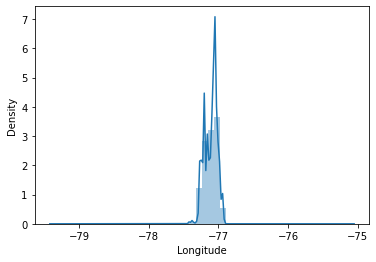

In [ ]:
sns.distplot(Demo_data['Longitude'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


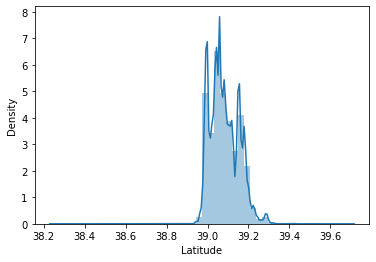

In [ ]:
sns.distplot(Demo_data['Latitude'])

# **EXPLORATORY DATA ANALYSIS**

Text(0.5, 0.98, ' Correlations Heat Map for attributes')

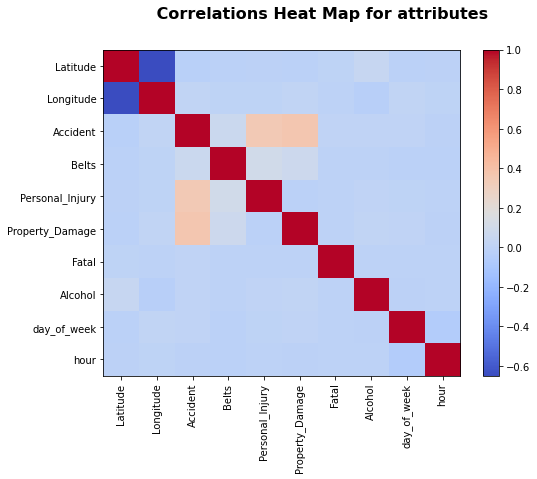

In [ ]:
#correlation 
corltn=Demo_data.drop(columns=['Violation','Commercial_License','Commercial_Vehicle','Work_Zone','year','month','Contributed_To_Accident']).corr()
corltn=corltn.fillna(0)
plt.figure(figsize=(8, 6))
plt.imshow(corltn, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corltn)), corltn.columns, rotation='vertical')
plt.yticks(range(len(corltn)), corltn.columns);
plt.suptitle(' Correlations Heat Map for attributes', fontsize=16, fontweight='bold')


**Insight** : Correlations are weak. But Accidents are more correlted to Property Damage , next is personal injury. Also next Belts and Personal injury are more correlated at 3rd place.






In [ ]:
#indexing by date of stop
Demo_data.index = pd.DatetimeIndex(Demo_data['Date_Of_Stop'])

In [ ]:
#creating another dataset of violations which only included accidents
mask1 = (Demo_data['Accident'] == 1)
df1 = Demo_data.loc[mask1]

In [ ]:
#Creating time series table for No of  traffic violation counts yearwise to study the pattern and trend  
vio_df1 = pd.DataFrame(zip(Demo_data['Violation'],Demo_data['month_code'],Demo_data['year']), columns=['violation','mon_code','year'])
table1 = pd.pivot_table(vio_df1, index = 'mon_code', values='violation', columns='year', aggfunc=np.sum)
table1

year,2012,2013,2014,2015,2016,2017,2018,2019
mon_code,,,,,,,,
Apr,11518,12779,17830,20067,18374,14906,18611,17234
Aug,12131,14592,17812,19428,17284,16302,17906,14681
Dec,10550,13761,14766,16825,15933,14604,15133,11100
Feb,9966,12326,13762,14571,17360,16171,16851,15101
Jan,9447,11907,15648,19251,15052,17114,18624,14024
Jul,12131,13674,17303,18729,17760,16252,16570,15505
Jun,12510,11847,16224,16726,16971,14903,16853,13860
Mar,11457,14127,16794,21634,18957,16577,18595,17522
May,15160,17653,19454,19746,18966,15887,16344,16922


In [ ]:
#Creating time series table for No of  traffic accidents counts yearwise to study the pattern and trend 
acc_df1 = pd.DataFrame(zip(df1['Accident'],df1['month_code'],df1['year']), columns=['accident','mon_code','year'])
table1 = pd.pivot_table(acc_df1, index = 'year', values='accident', columns='mon_code', aggfunc=np.sum)
table1

mon_code,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
2012,198,235,349,160,181,243,372,259,294,242,291,237
2013,283,268,294,274,345,312,255,305,365,314,343,217
2014,273,356,410,275,281,336,352,342,401,402,375,267
2015,340,311,416,419,410,341,426,280,410,374,442,408
2016,359,447,461,326,366,469,356,483,460,418,544,538
2017,474,442,480,389,464,407,417,412,523,369,404,457
2018,331,326,364,429,375,365,448,342,349,419,433,402
2019,333,328,366,385,401,453,408,360,366,370,446,335


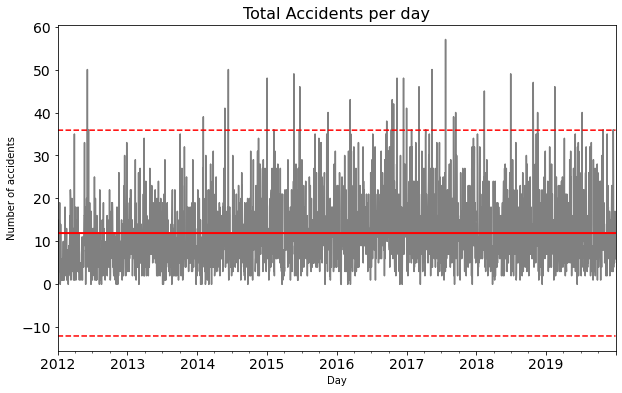

In [ ]:
#plotting time series for total accident per day trend
accidents_per_day = pd.DataFrame(df1.resample('D').size())
accidents_per_day['mean'] = df1.resample('D').size().mean()
accidents_per_day['std'] = df1.resample('D').size().std()
# upper control limit and lower control limit
UCL = accidents_per_day['mean'] + 3 * accidents_per_day['std']
LCL = accidents_per_day['mean'] - 3 * accidents_per_day['std']
plt.figure(figsize=(10,6))
df1.resample('D').size().plot(label='Accidents per day', color='grey')
UCL.plot(color='red', ls='--', linewidth=1.5, label='UCL')
LCL.plot(color='red', ls='--', linewidth=1.5, label='LCL')
accidents_per_day['mean'].plot(color='red', linewidth=2, label='Average')
plt.title('Total Accidents per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of accidents')
plt.tick_params(labelsize=14)

**Insight**: We can observe that the year 2017 has more number of acidents on many given day while from mid of 2012 and 2013 has lowest. Also we could see an upper limit of average of 35 accidents.

Text(0.5, 1.0, 'Total accidents per month')

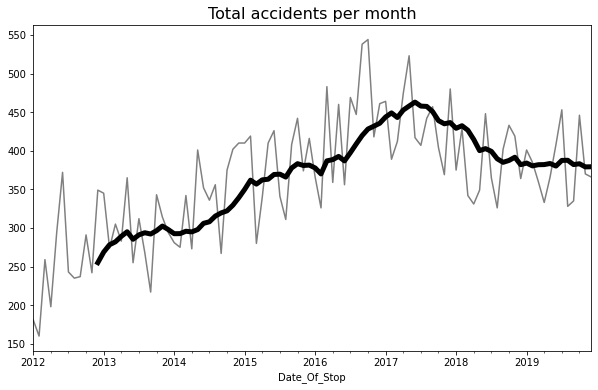

In [ ]:
#plotting time series for total accident per month trend
month_df = df1.resample('M').size()
plt.figure(figsize=(10,6))
month_df.plot(label='Total,  accidents per month', color='grey')
month_df.rolling(window=12).mean().plot(color='black', linewidth=5, label='12-Months Average')
plt.title('Total accidents per month', fontsize=16)

In [ ]:
print("Best Month {0}: {1}".format(month_df.idxmin(), month_df[month_df.idxmin()]))
print("Worst Month {0}: {1}".format(month_df.idxmax(), month_df[month_df.idxmax()]))

Best Month 2012-02-29 00:00:00: 160
Worst Month 2016-10-31 00:00:00: 544


**Insight**: There's a trend of increasing accidents per month. There was a steady increase from 2012 to 2017 in number of accidents per month. For almost all years we can see that there is a peak increase and a highest in mid of the year months and then a decrease per year. Feburary 2012 had the least amount of accidents October 2016 was the worst with 533 accidents

In [ ]:
#accidents per week day
weekdays = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
week_df = pd.DataFrame(df1["day_of_week"].value_counts()).sort_index()
week_df["day"] = weekdays
week_df.columns = ["Accident counts", "Week day"]
week_df

,Accident counts,Week day
0,4831,Sun
1,4987,Mon
2,5002,Tue
3,5059,Wed
4,5322,Thu
5,4762,Fri
6,4919,Sat


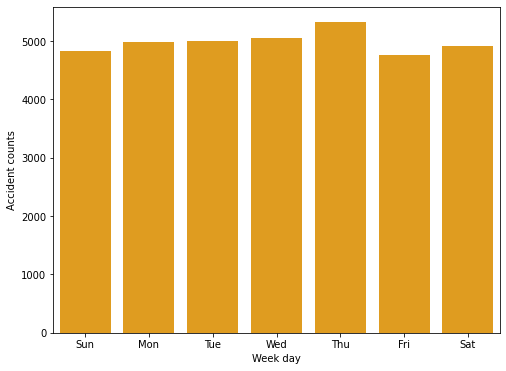

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x="Week day", y="Accident counts", color="orange", data=week_df)

**Insight**: The above pattern indicates that the traffic accidents peaks from Monday and mostly occur predominantly on Tuesday and Thursday while Friday has the least no of accidents.

In [ ]:
hour = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']
hour_df = pd.DataFrame(df1["hour"].value_counts()).sort_index()
hour_df["day"] = hour
hour_df.columns = ["Accident counts", "Hour"]
hour_df

,Accident counts,Hour
1,1241,1
2,1102,2
3,989,3
4,1121,4
5,857,5
6,733,6
7,959,7
8,1415,8
9,1811,9
10,1547,10


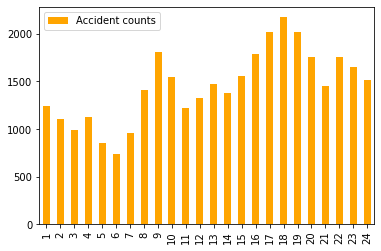

In [ ]:
hour_df.plot(kind = 'bar', color = 'orange')

**Insight**: The traffic accidents mainly peak at 9 AM in the Morning and from 6 PM in the evening. This indicates that its mainly occuring in the office rush hours of the day.

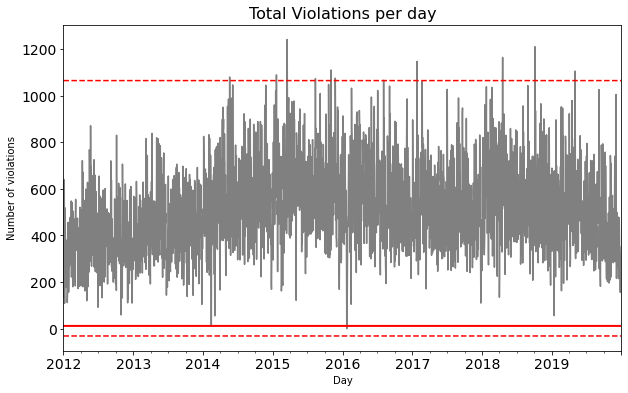

In [ ]:
#plotting time series for total violation per day trend
violations_per_day = pd.DataFrame(Demo_data.resample('D').size())
violations_per_day['mean'] = Demo_data.resample('D').size().mean()
violations_per_day['std'] = Demo_data.resample('D').size().std()
# upper control limit and lower control limit
UCL = violations_per_day['mean'] + 3 * violations_per_day['std']
LCL = violations_per_day['mean'] - 3 * violations_per_day['std']
plt.figure(figsize=(10,6))
Demo_data.resample('D').size().plot(label='Violations per day', color='grey')
UCL.plot(color='red', ls='--', linewidth=1.5, label='UCL')
LCL.plot(color='red', ls='--', linewidth=1.5, label='LCL')
accidents_per_day['mean'].plot(color='red', linewidth=2, label='Average')
plt.title('Total Violations per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of violations')
plt.tick_params(labelsize=14)

**Insight**: We can see that number of violations per day are more in the year 2019 and less in 2017 and 2018

Text(0.5, 1.0, 'Total Violations per month')

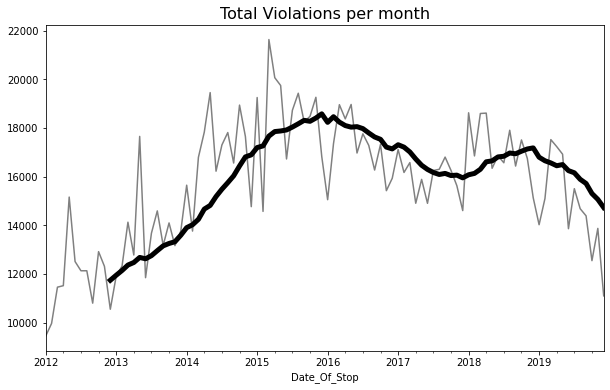

In [ ]:
#plotting time series for total violation per month trend
month_df = Demo_data.resample('M').size()
plt.figure(figsize=(10,6))
month_df.plot(label='Total,  violations per month', color='grey')
month_df.rolling(window=12).mean().plot(color='black', linewidth=5, label='12-Months Average')
plt.title('Total Violations per month', fontsize=16)

In [ ]:
print("Best Month {0}: {1}".format(month_df.idxmin(), month_df[month_df.idxmin()]))
print("Worst Month {0}: {1}".format(month_df.idxmax(), month_df[month_df.idxmax()]))

Best Month 2012-01-31 00:00:00: 9447
Worst Month 2015-03-31 00:00:00: 21634


**Insight**:The number of violations are highest in 2012 and the trend in violations over the years is decresing. There is a remarkable decrease in 2017, 2018 and 2013. Also violations follow a similar trend like accidents which is peak increase and a highest in mid of the year months and then a decrease per year. Now again the violation count is gradually increasing by 2019. June 2017 had the least amount of violations May 2012 was the worst with 14974 violations

In [ ]:
#plotting time series for total violation per weekday trend
weekdays = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
week_df = pd.DataFrame(Demo_data["day_of_week"].value_counts()).sort_index()
week_df["day"] = weekdays
week_df.columns = ["Violation counts", "Week day"]
week_df

,Violation counts,Week day
0,209568,Sun
1,245751,Mon
2,234735,Tue
3,226989,Wed
4,229627,Thu
5,184344,Fri
6,178703,Sat


**Insight**:The below pattern indicates that the traffic violations have an upper trend on week days and it lowers during weekends. Monday registers the highest whereas Saturday registers the lowest number of traffic violations

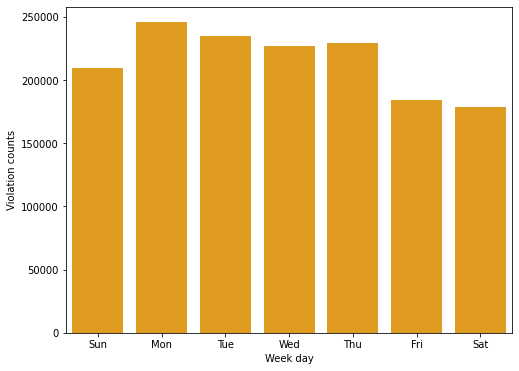

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x="Week day", y="Violation counts", color="orange", data=week_df)

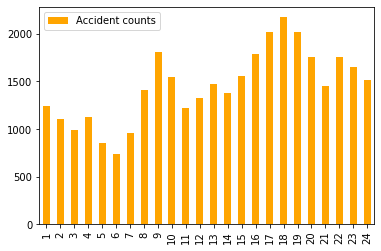

In [ ]:
hour_df.plot(kind = 'bar', color = 'orange')

**Insight**: As per the box plot the traffic violations starts to peak from 9 AM in th Morning. The maximum cases of traffic violations occur from night 10 PM to midnight.

Text(0.5, 0, 'Number of Cases')

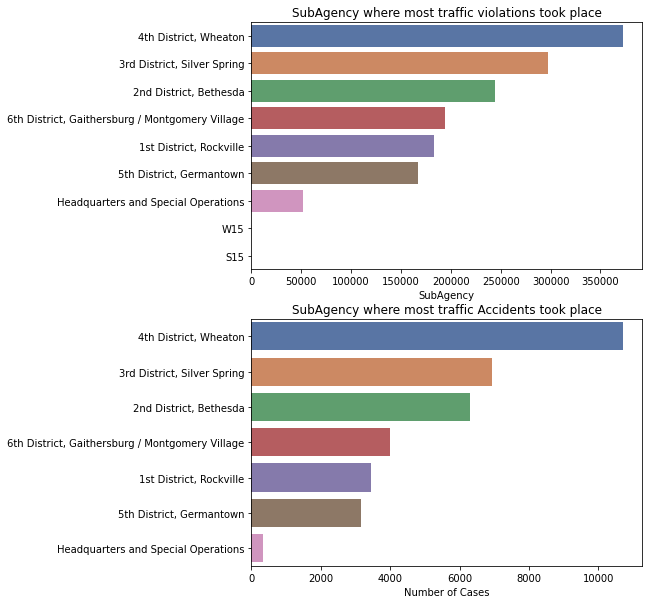

In [ ]:
#SubAgency
plt.figure(figsize=(7,10))
plt.subplot(211)
chains=Demo_data['SubAgency'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("SubAgency where most traffic violations took place")

plt.subplot(212)
chains=df1['SubAgency'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("SubAgency where most traffic Accidents took place")
plt.xlabel("Number of Cases")

**Insights**: We see that most of the traffic violations and also violations that involved accidents took place in 4th District, Wheaton Subagency



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'count')

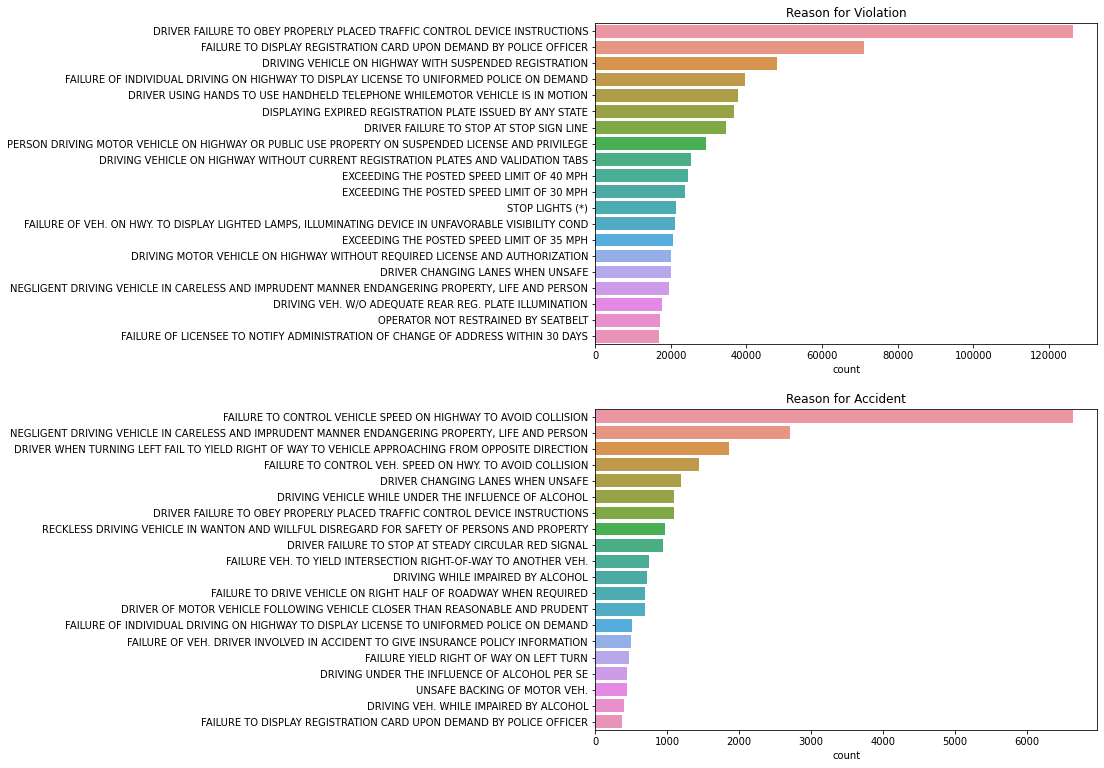

In [ ]:
#Description
plt.figure(figsize=(9,13))
plt.subplot(211)
rest=Demo_data['Description'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Reason for Violation")
plt.xlabel("count")

plt.subplot(212)
rest=df1['Description'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Reason for Accident")
plt.xlabel("count")

**Insight**: Most of the violations took place at IS 370 @IS 270 and the highest accidents hotspot is at GEORGIA AVE/FOREST GLEN RD

In [ ]:
Demo_data.Accident.value_counts()

0    1474835
1      34882
Name: Accident, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Traffic violations that are accidents')

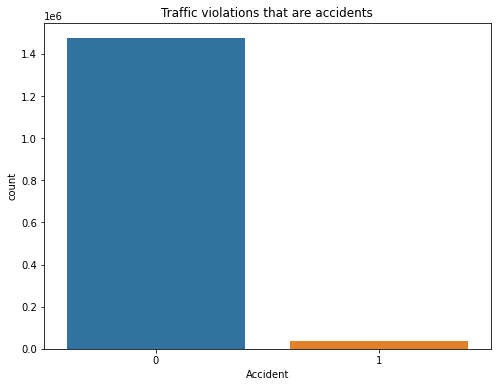

In [ ]:
sns.countplot(Demo_data['Accident'])
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.title('Traffic violations that are accidents')

**Insight**: Over 8 years from 2012-2019 out of the 1M traffiv violations around 33k accidents were recorded which is about 3.5%(quite less) but the alarming issue here is the reason for accident inspite of many safety precautions and signs.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Violations for Traffic accidents')

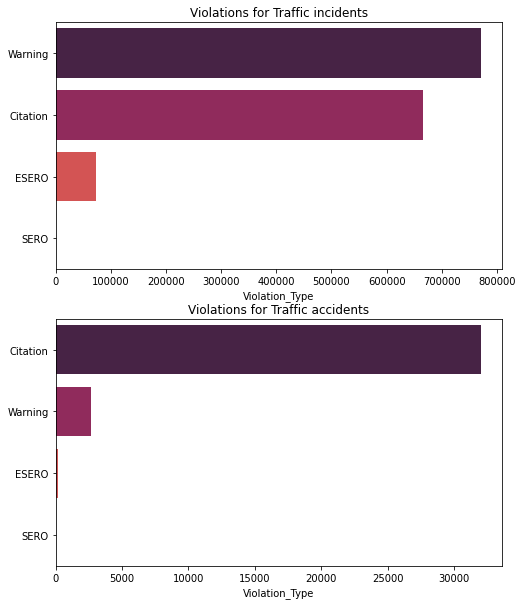

In [ ]:
#Violation
plt.figure(figsize=(8,10))
plt.subplot(211)
Rest_locations=Demo_data['Violation_Type'].value_counts()[:20]
sns.barplot(Rest_locations,Rest_locations.index,palette="rocket")
plt.title("Violations for Traffic incidents")

plt.subplot(212)
Rest_locations=df1['Violation_Type'].value_counts()[:20]
sns.barplot(Rest_locations,Rest_locations.index,palette="rocket")
plt.title("Violations for Traffic accidents")

**Insight**: A majority of traffic violations have citations but also there are around 30% of incidents which are left with warnings, being spared the actual citations. This should be decreased and be taken care of by officials by implementating more rules. Obviously almost all accidents have citations and very few have warnings.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Type of the vehicle involved in Traffic accident')

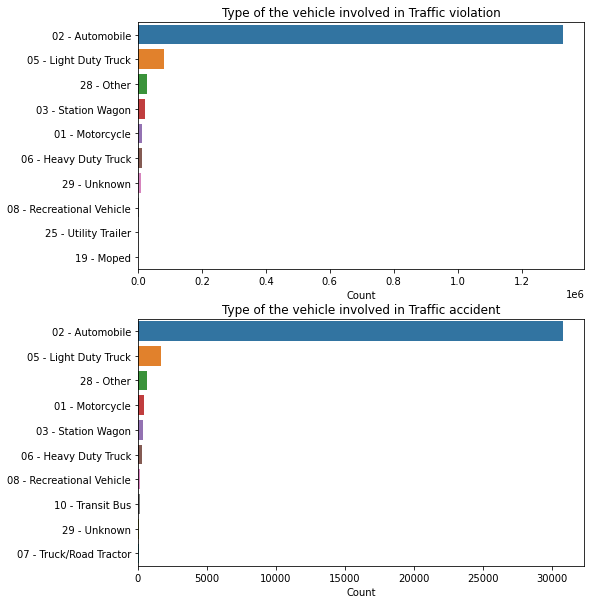

In [ ]:
#Vehicle_Type
plt.figure(figsize=(8,10))
plt.subplot(211)
cuisines=Demo_data['VehicleType'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Type of the vehicle involved in Traffic violation")

plt.subplot(212)
cuisines=df1['VehicleType'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Type of the vehicle involved in Traffic accident")

<Figure size 648x648 with 0 Axes>

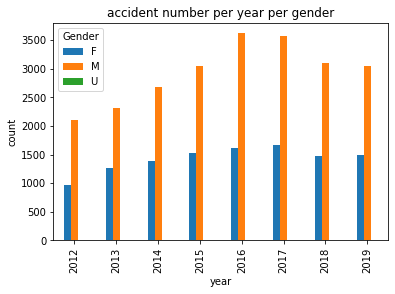

In [ ]:
#Gender-wise traffic accidents
g = Demo_data[['Accident','Gender','year']]
plt.figure(figsize=(9,9))
count2 = g.groupby(['year','Gender'])
totalsum = count2['Accident'].aggregate(np.sum).unstack()
totalsum.plot(kind = 'bar', title = 'accident number per year per gender')
plt.ylabel('count')
plt.show()

**Insight**: Most of the accidents are due to male in any given year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


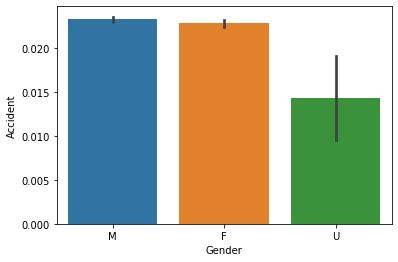

In [ ]:
# Plot
sns.barplot(Demo_data['Gender'],Demo_data['Accident']);

**Insight**: About 3.6% of the total female gender involved in a traffic violation lead to accident which is very also very close to male.

<Figure size 1224x1008 with 0 Axes>

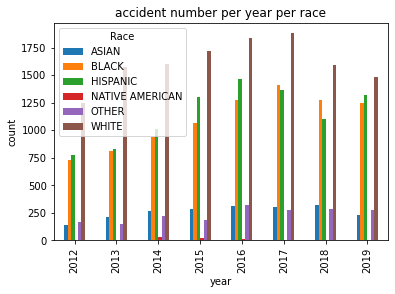

In [ ]:
#Race-wise traffic accidents
r = Demo_data[['Accident','Race','year']]
plt.figure(figsize=(17,14))
count3 = r.groupby(['year','Race'])
totalsum = count3['Accident'].aggregate(np.sum).unstack()
totalsum.plot(kind = 'bar', title = 'accident number per year per race')
plt.ylabel('count')
plt.show()

**Insight**:Most of the accidents are due to white in any given year and least due to native american

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


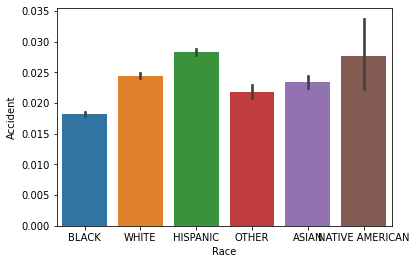

In [ ]:
sns.barplot(Demo_data['Race'],Demo_data['Accident']);

**Insight**: Surprisingly out of the total Native Americans, 4% of them are more involved in accidents which is highest and almost equal to hispanic

In [ ]:
#total fatal crashes due to accidents
df1.Fatal.value_counts()

0    34833
1       49
Name: Fatal, dtype: int64

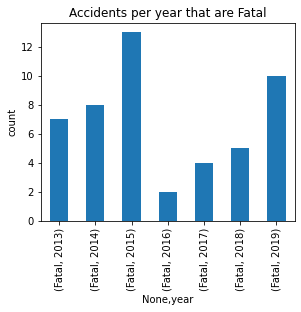

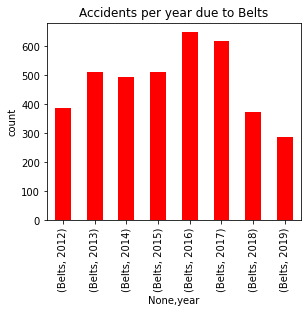

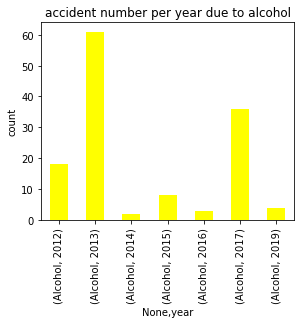

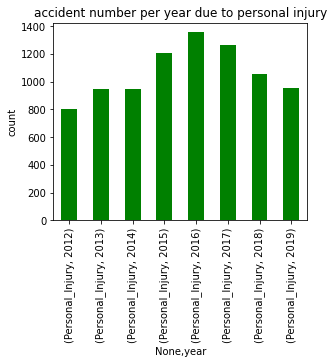

In [ ]:
#Analysing the reasons for accident (Seat Belt, Alcohol) and driver's condition after the accident like Fatal and personal injury
plt.figure(figsize=(10,8))
df5 = df1
mask = (df5['Date_Of_Stop'] >= '2012-1-1') & (df5['Date_Of_Stop'] < '2020-1-1') & (df5['Fatal'] != 0)
df5 = df5.loc[mask]

df6 = df5[['Fatal','year']]
count4 = df6.groupby('year')
totalsum = count4.aggregate(np.sum).unstack()
plt.subplot(2,2,1)
totalsum.plot(kind = 'bar', title = 'Accidents per year that are Fatal')
plt.ylabel('count')
plt.show()


plt.figure(figsize=(10,8))
df5 = df1
mask = (df5['Date_Of_Stop'] >= '2012-1-1') & (df5['Date_Of_Stop'] < '2020-1-1') & (df5['Belts'] != 0)
df5 = df5.loc[mask]
df4 = df5[['Belts','year']]
count4 = df4.groupby('year')
totalsum = count4.aggregate(np.sum).unstack()
plt.subplot(2,2,2)
totalsum.plot(kind = 'bar', title = 'Accidents per year due to Belts',color='red')
plt.ylabel('count')
plt.show()


plt.figure(figsize=(10,8))
df5 = df1
mask = (df5['Date_Of_Stop'] >= '2012-1-1') & (df5['Date_Of_Stop'] < '2020-1-1') & (df5['Alcohol'] != 0)
df5 = df5.loc[mask]
df7= df5[['Alcohol','year']]
count3 = df7.groupby('year')
totalsum = count3.aggregate(np.sum).unstack()
plt.subplot(2,2,3)
totalsum.plot(kind = 'bar', title = 'accident number per year due to alcohol',color='yellow')
plt.ylabel('count')
plt.show()


plt.figure(figsize=(10,8))
df5 = df1
mask = (df5['Date_Of_Stop'] >= '2012-1-1') & (df5['Date_Of_Stop'] < '2020-1-1') & (df5['Personal_Injury'] != 0)
df5 = df5.loc[mask]
df8= df5[['Personal_Injury','year']]
count3 = df8.groupby('year')
totalsum = count3.aggregate(np.sum).unstack()
plt.subplot(2,2,4)
totalsum.plot(kind = 'bar', title = 'accident number per year due to personal injury', color='green')
plt.ylabel('count')
plt.show()

**INSIGHT**: We can see most of the accidents are due to seat belt violations than alcohol related. There are no alcohol related accidents in 2018. 2015 has the highest no of accidents that are fatal. In all years there are high number of personal injury cases due to accidents.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


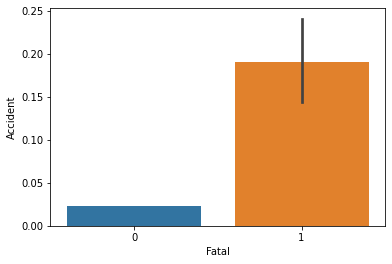

In [ ]:
sns.barplot(Demo_data['Fatal'],Demo_data['Accident']);

**INSIGHT**: Around 25% of the total Fatal cases are due to accidents. Surprisingly, around 70% of Fatal cases are not due to accidents but due to other violations

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


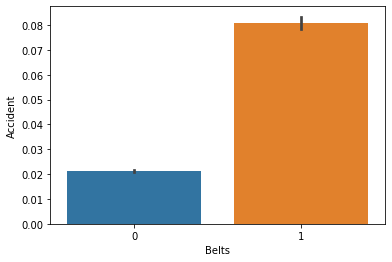

In [ ]:
sns.barplot(Demo_data['Belts'],Demo_data['Accident']);

**INSIGHT**:Around 10% of total cases of not wearing Seat belts violation lead to accident

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


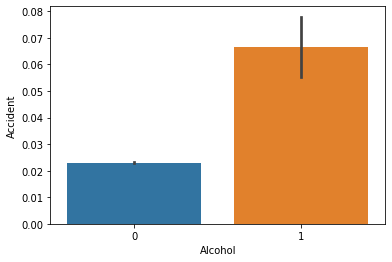

In [ ]:
sns.barplot(Demo_data['Alcohol'],Demo_data['Accident']);

**INSIGHT**: Around 7% of total cases of drunk and drive violations(alcohol) lead to accident

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


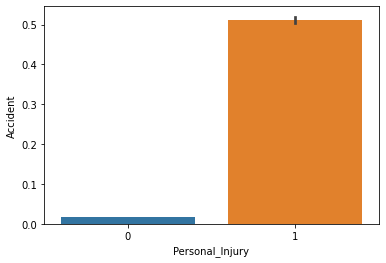

In [ ]:
sns.barplot(Demo_data['Personal_Injury'],Demo_data['Accident']);

**INSIGHT**: Obviously around 50% of the total personal injury cases are due to accidents

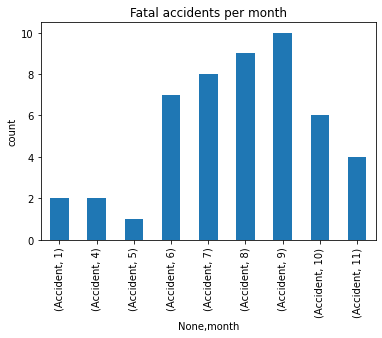

In [ ]:
df5 = df1
mask = (df5['Date_Of_Stop'] >= '2012-1-1') & (df5['Date_Of_Stop'] < '2020-1-1') & (df5['Fatal'] != 0)
df5 = df5.loc[mask]

df5 = df5[['Accident','month']]
count4 = df5.groupby('month')
totalsum = count4.aggregate(np.sum).unstack()
totalsum.plot(kind = 'bar', title = 'Fatal accidents per month')
plt.ylabel('count')
plt.show()

**Insight**: More fatal accidents occured in the month of September and a high number over the years during the period of june to september. We can have a more detailed understanding, if we take a look at how severe weather affect driving safety? A future work where we can predict how weather conditions leads to accidents and Fatal crashes

In [ ]:
#Violation-wise traffic incidents
sub_df1 = pd.DataFrame(zip(Demo_data['Violation_Type'],Demo_data['Alcohol'],Demo_data['Belts'],Demo_data['Fatal'],Demo_data['Accident'],Demo_data['Work_Zone'],Demo_data['Personal_Injury'],Demo_data['Property_Damage']), columns=['violation','alcohol','belts','fatal','accident','workzone','personalinjury','propertydamage'])
sub_df1['alcohol'] = sub_df1.alcohol.eq(1).mul(1)
sub_df1['belts'] = sub_df1.belts.eq(1).mul(1)
sub_df1['fatal'] = sub_df1.fatal.eq(1).mul(1)
sub_df1['accident'] = sub_df1.accident.eq(1).mul(1)
sub_df1['workzone'] = sub_df1.workzone.eq(1).mul(1)
sub_df1['personalinjury'] = sub_df1.personalinjury.eq(1).mul(1)
sub_df1['propertydamage'] = sub_df1.propertydamage.eq(1).mul(1)
table1 = pd.pivot_table(sub_df1, values=['alcohol','belts','fatal','accident','workzone','personalinjury','propertydamage'], columns='violation', aggfunc=np.mean)
table1

violation,Citation,ESERO,SERO,Warning
accident,0.048067,0.002533,0.012270,0.003487
alcohol,0.002783,0.000110,0.002454,0.000162
belts,0.041619,0.026403,0.076074,0.022985
fatal,0.000212,0.000096,0.000000,0.000141
personalinjury,0.023170,0.000220,0.000000,0.001590
propertydamage,0.036806,0.000840,0.000000,0.003147
workzone,0.000287,0.000069,0.000000,0.000131


**Insight**: 
1. We can see that Alcohol violations generated citations 9.43 (0.002896/0.000307) times more often than they generated warnings.
2. accident 7.35 (0.050712/0.006899)
3. personal injury 6.65 (0.024236/0.003644)
4. property damage 5.58 (0.038769/0.006937)
5. work zone 1.47 (0.000274/0.000186)

This is much higher than the 1.28 times for Seat Belts (0.040903/0.031754) , 1.17 (0.000219/0.000186) for Fatal Crashes or 1.47 (0.000274/0.000186) for work zone violations. As a result, it would seem that Maryland Police are more strict on alcohol violations than for the other two.

In [ ]:
table2 = pd.pivot_table(sub_df1, values=['alcohol','belts','fatal','accident','workzone','personalinjury','propertydamage'], columns='violation', aggfunc=np.sum)
table2

violation,Citation,ESERO,SERO,Warning
accident,32001,184,10,2687
alcohol,1853,8,2,125
belts,27708,1918,62,17710
fatal,141,7,0,109
personalinjury,15426,16,0,1225
propertydamage,24504,61,0,2425
workzone,191,5,0,101


<Figure size 1224x1008 with 0 Axes>

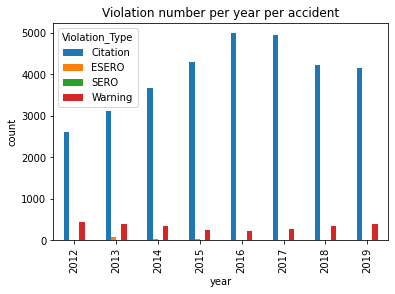

In [ ]:
#Violation-wise traffic accidents
df4 = Demo_data[['Accident','Violation_Type','year']]
plt.figure(figsize=(17,14))
count3 = df4.groupby(['year','Violation_Type'])
totalsum = count3['Accident'].aggregate(np.sum).unstack()
totalsum.plot(kind = 'bar', title = 'Violation number per year per accident')
plt.ylabel('count')
plt.show()

**Insight**: We can see there are more citations in any given year. But our main motto is to see how strict are MD police on accidents, fatal crashes, property damage, seat belt violations, personal injury and alcohol

In [ ]:
#Analysis on violations_types on seat belt, alcohol related and fatal crashes which are main reasons for accidents
table2 = pd.pivot_table(sub_df1, values=['alcohol','belts','fatal'], index=['violation'], aggfunc=np.sum)

In [ ]:
table2 = pd.DataFrame(table2, columns=['alcohol','belts','fatal'])
alc_df = table2[table2['alcohol']!=0]
alc_df = alc_df.sort_values('alcohol', ascending=False)
alc_df = pd.DataFrame(alc_df.alcohol,columns=['alcohol'])
alc_df.head()

,alcohol
violation,
Citation,1853
Warning,125
ESERO,8
SERO,2


In [ ]:
belts_df = table2[table2['belts']!=0]
belts_df = belts_df.sort_values('belts', ascending=False)
belts_df = pd.DataFrame(belts_df.belts,columns=['belts'])
belts_df.head(30)

,belts
violation,
Citation,27708
Warning,17710
ESERO,1918
SERO,62


In [ ]:
fatal_df = table2[table2['fatal']!=0]
fatal_df = fatal_df.sort_values('fatal', ascending=False)
fatal_df = pd.DataFrame(fatal_df.fatal,columns=['fatal'])
fatal_df.head(30)

,fatal
violation,
Citation,141
Warning,109
ESERO,7


**Insight**: One clear conclusion here is that, despite the obvious presence of seat belt enforcement measures on the streets of Maryland, there is still a surprisingly large number of violations of the **seat belt code traffic violations(around 25k citations)** when compared to **alcohol traffic violations(around 1.7k)**. This might motivate local and state governments to put more resources toward this or work with vehicle manufacturers to develop methods to reduce such violations.

**Is there a strong link between reckless drivers( under influence of alcohol,seat belt violation ) and road accidents.**

**Predict the likelihood of a driver causing road accident**

In [ ]:
sub_df1 = pd.DataFrame(zip(Demo_data['Description'],Demo_data['SubAgency'],Demo_data['Location'],Demo_data['Accident'],Demo_data['Alcohol'],Demo_data['Belts'],Demo_data['Fatal'],Demo_data['Geolocation'],Demo_data['Longitude'],Demo_data['Latitude']), columns=['description','subagency','location','accident','alcohol','belts','fatal','co-ordinates','long','lat'])
sub_df1['alcohol'] = sub_df1.alcohol.eq(1).mul(1)
sub_df1['belts'] = sub_df1.belts.eq(1).mul(1)
sub_df1['fatal'] = sub_df1.fatal.eq(1).mul(1)
sub_df1['accident'] = sub_df1.accident.eq(1).mul(1)

In [ ]:
table4 = pd.pivot_table(sub_df1, values=['alcohol','belts','fatal','accident'], index=['description'], aggfunc=np.sum)
table4 = pd.DataFrame(table4, columns=['alcohol','belts','fatal','accident'])

In [ ]:
acc_df = table4[table4['accident']!=0]
acc_df = acc_df.sort_values('accident', ascending=False)
acc_df = pd.DataFrame(acc_df.accident,columns=['accident'])
acc_df.head(10)

,accident
description,
FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO AVOID COLLISION,6640
"NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPRUDENT MANNER ENDANGERING PROPERTY, LIFE AND PERSON",2703
DRIVER WHEN TURNING LEFT FAIL TO YIELD RIGHT OF WAY TO VEHICLE APPROACHING FROM OPPOSITE DIRECTION,1863
FAILURE TO CONTROL VEH. SPEED ON HWY. TO AVOID COLLISION,1443
DRIVER CHANGING LANES WHEN UNSAFE,1198
DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF ALCOHOL,1101
DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS,1099
RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL DISREGARD FOR SAFETY OF PERSONS AND PROPERTY,970
DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED SIGNAL,941


**INSIGHT:** SPEED CONTROL AND NEGLIGENT DRIVING(Reckless drivers) are the main reason for accidents around 34%. Where as accidents under the influence of alcohol are less when compared to speed driving (less than 10%)


In [ ]:
#locations for more accidents over the years
table6 = pd.pivot_table(sub_df1, values=['alcohol','belts','fatal','accident'], index=['location'], aggfunc=np.sum)
table6 = pd.DataFrame(table6, columns=['alcohol','belts','fatal','accident'])

In [ ]:
acc_df = table6[table6['accident']!=0]
acc_df = acc_df.sort_values('accident', ascending=False)
acc_df = pd.DataFrame(acc_df.accident,columns=['accident'])
acc_df.head(10)

,accident
location,
GEORGIA AVE/FOREST GLEN RD,50
11219 GRANDVIEW AVE,43
3400 MAY ST,40
GEORGIA AVE @ HEWITT AVE,39
RANDOLPH RD / CONNECTICUT AVE,38
HEWITT AVE & RIPPLING BROOK DR,37
CLARA BARTON PKWY,36
GEORGIA AVE/ARCOLA AVE,34
NEW HAMPSHIRE AVE @ RANDOLPH RD,33


**INSIGHT:** GEORGIA AVE/FOREST GLEN RD location has recorded more no of accidents over the eight years around 50

In [ ]:
#Geographical hotspots for more accidents over the years
table8 = pd.pivot_table(sub_df1, values=['alcohol','belts','fatal','accident'], index=['long','lat','location'], aggfunc=np.sum)
table8 = pd.DataFrame(table8, columns=['alcohol','belts','fatal','accident'])

In [ ]:
acc_df = table8[table8['accident']!=0]
acc_df = acc_df.sort_values('accident', ascending=False)
acc_df = pd.DataFrame(acc_df.accident,columns=['accident'])
acc_df.head(10)

,,,accident
long,lat,location,
-77.048618,39.059903,3400 MAY ST,40
-77.235740,39.113415,CLARA BARTON PKWY,32
-76.982647,39.042938,1006 KERWIN ROAD,28
-77.001010,39.043590,9909 DILSTON RD,28
-77.109880,38.997783,CONNECTICUT AVE AT KENSINGTON PKW,27
-77.070242,39.041697,NB COLUMBIA PIKE/GREENCASTLE RD,27
-77.048175,39.058374,GEORGIA AVE/FOREST GLEN RD,26
-76.992220,39.049957,1510 DILSTON ROAD,26
-77.223045,39.148865,ARCOLA AT PARKER,25


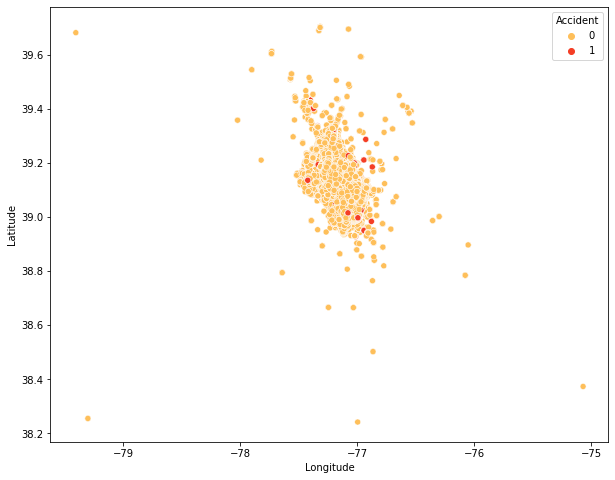

In [ ]:
#Accident plot in the whole traffic violations recorded
plt.figure(figsize=(10,8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Accident',palette='YlOrRd', data=Demo_data)



**INSIGHT**: Most of the accidents recorded are at the northern part of the county

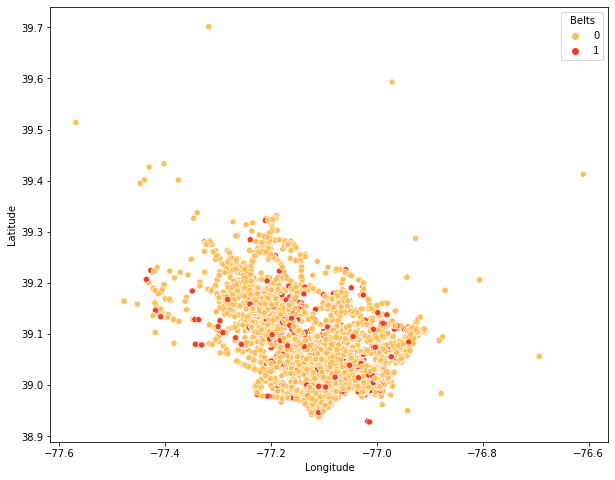

In [ ]:
#Seat Belt violations plot in traffic accidents recorded
plt.figure(figsize=(10,8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Belts',palette='YlOrRd', data=df1)

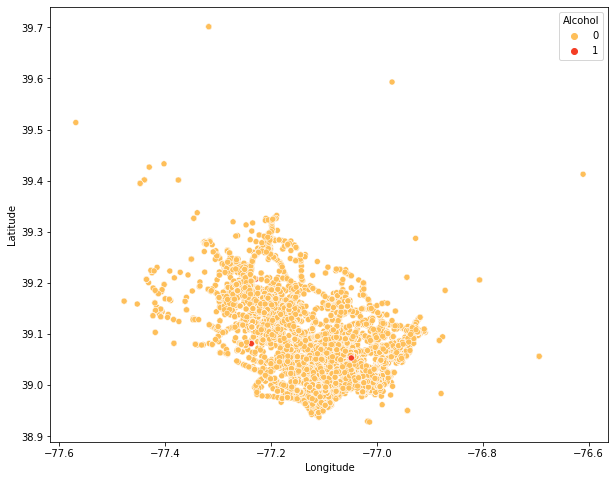

In [ ]:
#Alcohol related plot in traffic accidents recorded
plt.figure(figsize=(10,8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Alcohol',palette='YlOrRd', data=df1)

**INSIGHT**: From the above two scatter plots we could see more no of accidents are due to seat belt violations than alcohol related

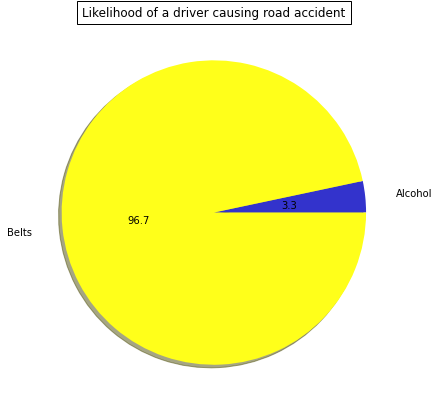

In [ ]:
#Likelihood of a driver causing accident
slices=[((Demo_data.Accident==1) & (Demo_data.Alcohol==1)).sum(),
        ((Demo_data.Accident==1) & (Demo_data.Belts==1)).sum(),
       ]
labels=['Alcohol','Belts']
colors = ['#3333cc','#ffff1a']
plt.pie(slices,colors=colors, labels=labels, autopct='%.1f', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Likelihood of a driver causing road accident", bbox={'facecolor':'1', 'pad':5})

fig.set_size_inches(7,7)
plt.show()

**INSIGHT:** When compared between seat belt violation and alcohol related accidents, a driver under seat belt violations (97%) resulted in more accidents than alcohol (just 3%). Again a conclusion that despite the obvious presence of seat belt enforcement measures, there is still a surprisingly large number of violations leading to accidents.

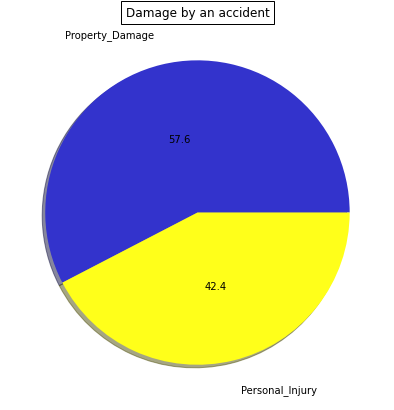

In [ ]:
#Damage by an accident
slices=[((Demo_data.Accident==1) & (Demo_data.Property_Damage==1)).sum(),
        ((Demo_data.Accident==1) & (Demo_data.Personal_Injury==1)).sum(),
       ]
labels=['Property_Damage','Personal_Injury']
colors = ['#3333cc','#ffff1a']
plt.pie(slices,colors=colors, labels=labels, autopct='%.1f', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Damage by an accident", bbox={'facecolor':'1', 'pad':5})

fig.set_size_inches(7,7)
plt.show()

**INSIGHT:** When compared between property damage or personal injury in accidents, property damage done by an accident is more than personal injury

In [ ]:
#Reasons for an accident
sub_df1 = pd.DataFrame(zip(Demo_data['Accident'],Demo_data['Alcohol'],Demo_data['Belts'],Demo_data['Fatal'],Demo_data['Work_Zone'],Demo_data['Personal_Injury'],Demo_data['Property_Damage']), columns=['accident','alcohol','belts','fatal','workzone','personalinjury','propertydamage'])
sub_df1['alcohol'] = sub_df1.alcohol.eq(1).mul(1)
sub_df1['belts'] = sub_df1.belts.eq(1).mul(1)
sub_df1['fatal'] = sub_df1.fatal.eq(1).mul(1)
sub_df1['accident'] = sub_df1.accident.eq(1).mul(1)
sub_df1['workzone'] = sub_df1.workzone.eq(1).mul(1)
sub_df1['personalinjury'] = sub_df1.personalinjury.eq(1).mul(1)
sub_df1['propertydamage'] = sub_df1.propertydamage.eq(1).mul(1)
table1 = pd.pivot_table(sub_df1, values=['alcohol','belts','fatal','workzone','personalinjury','propertydamage'], columns='accident', aggfunc=np.sum)
table1

accident,0,1
alcohol,1856,132
belts,43563,3835
fatal,208,49
personalinjury,8138,8529
propertydamage,15395,11595
workzone,284,13


In [ ]:
sub_df1 = pd.DataFrame(zip(Demo_data['Accident'],Demo_data['Alcohol'],Demo_data['Belts'],Demo_data['Fatal']), columns=['accident','alcohol','belts','fatal'])
sub_df1['alcohol'] = sub_df1.alcohol.eq(1).mul(1)
sub_df1['belts'] = sub_df1.belts.eq(1).mul(1)
sub_df1['fatal'] = sub_df1.fatal.eq(1).mul(1)
table1 = pd.pivot_table(sub_df1, values=['alcohol','belts','fatal'], columns='accident', aggfunc=np.mean)
table1

accident,0,1
alcohol,0.001258,0.003784
belts,0.029538,0.109942
fatal,0.000141,0.001405


**INSIGHT**:
1. alcohol related leading to accident is 1.80 times more than not leading to accident
2. seat belt violation leading to accident is 3.01 times more than not leading to accident

In [ ]:
#Reasons for an fatal crashes
sub_df1 = pd.DataFrame(zip(Demo_data['Accident'],Demo_data['Alcohol'],Demo_data['Belts'],Demo_data['Fatal']), columns=['accident','alcohol','belts','fatal'])
sub_df1['alcohol'] = sub_df1.alcohol.eq(1).mul(1)
sub_df1['belts'] = sub_df1.belts.eq(1).mul(1)
sub_df1['fatal'] = sub_df1.fatal.eq(1).mul(1)
sub_df1['accident'] = sub_df1.accident.eq(1).mul(1)
table1 = pd.pivot_table(sub_df1, values=['alcohol','belts','accident'], columns='fatal', aggfunc=np.sum)
table1

fatal,0,1
accident,34833,49
alcohol,1988,0
belts,47386,12


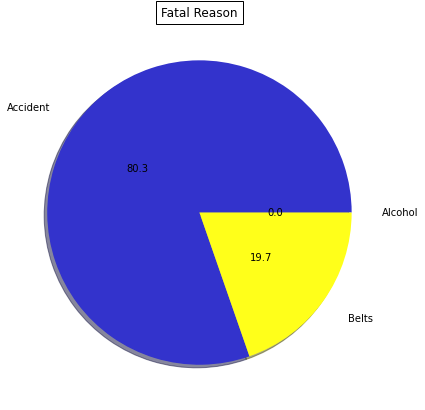

In [ ]:
slices=[((Demo_data.Fatal==1) & (Demo_data.Accident==1)).sum(),
        ((Demo_data.Fatal==1) & (Demo_data.Belts==1)).sum(),
        ((Demo_data.Fatal==1) & (Demo_data.Alcohol==1)).sum(),
       ]
labels=['Accident','Belts','Alcohol']
colors = ['#3333cc','#ffff1a','#c2c2d6']
plt.pie(slices,colors=colors, labels=labels, autopct='%.1f', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Fatal Reason", bbox={'facecolor':'1', 'pad':5})

fig.set_size_inches(7,7)
plt.show()

**INSIGHT**: When compared to accident, seat belt violations and alcohol. Obviously most of the fatal crashes are due to other type accidents than belt violations and alcohol related accidents. Surprisingly No alcohol related lead to a fatal crash

In [ ]:
description = pd.DataFrame(list(zip(Demo_data.Description.value_counts().index,Demo_data.Description.value_counts())), columns=['Description','value'], index=None)

**Based on the description column details can we identify whether its a moving or a non moving traffic violation?**

In [ ]:
#Most common reasons for violations
from wordcloud import WordCloud, STOPWORDS
catcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=1440,
                          height=1080
                         ).generate(" ".join(description['Description'].values))

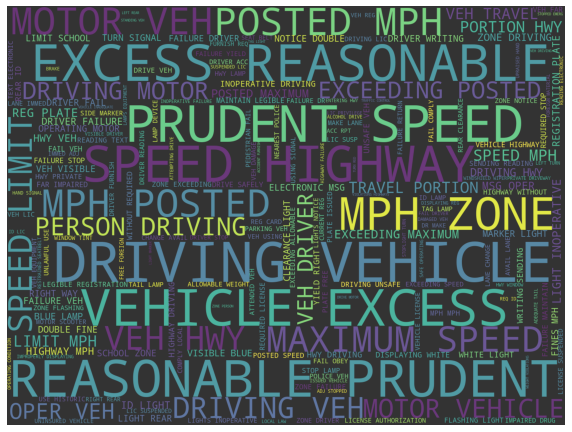

In [ ]:
fig = plt.figure(1,figsize=(10,8))
plt.imshow(catcloud, alpha=0.8)
plt.axis('off')
plt.show()

**INSIGHT**: Based on the description column we could see most of the violations are due to prudent speed(driving faster than reasonable speed), speed driving, MPH zone(crossing the MPH speed). Also we could see most of the violations are due to moving car violations rather than non-moving like parking tickets etc.,

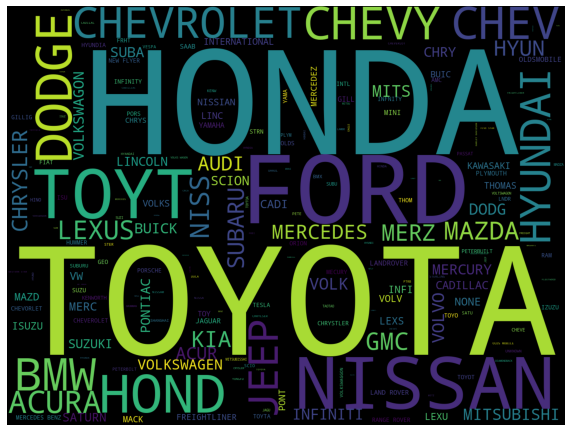

In [ ]:
#most common car maker in traffic accidents
from wordcloud import WordCloud
wordcloud = (WordCloud(width=1440, height=1080).generate_from_frequencies(df1.Make.value_counts()))


fig = plt.figure(1,figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off');

**INSIGHTS**: Toyota, Ford and Honda are involved in most of the accidents

## **DATA MODELLING**

 Applying models to predict if a traffic violation has lead to accident
  1. Converting the categorical data to numerical data
  2. LabelEncoder used for converting categorical data to numerical data(Automatic)

In [ ]:
#Traffic violations
Demo_data.dtypes

Date_Of_Stop               datetime64[ns]
Time_Of_Stop               datetime64[ns]
SubAgency                          object
Description                        object
Location                           object
Latitude                          float64
Longitude                         float64
Accident                            int64
Belts                               int64
Personal_Injury                     int64
Property_Damage                     int64
Fatal                               int64
Commercial_License                  int64
Commercial_Vehicle                  int64
Alcohol                             int64
Work_Zone                           int64
VehicleType                        object
Make                               object
Model                              object
Violation_Type                     object
Contributed_To_Accident              bool
Race                               object
Gender                             object
Geolocation                       

In [ ]:
#Traffic accidents
df1.dtypes

Date_Of_Stop               datetime64[ns]
Time_Of_Stop               datetime64[ns]
SubAgency                          object
Description                        object
Location                           object
Latitude                          float64
Longitude                         float64
Accident                            int64
Belts                               int64
Personal_Injury                     int64
Property_Damage                     int64
Fatal                               int64
Commercial_License                  int64
Commercial_Vehicle                  int64
Alcohol                             int64
Work_Zone                           int64
VehicleType                        object
Make                               object
Model                              object
Violation_Type                     object
Contributed_To_Accident              bool
Race                               object
Gender                             object
Geolocation                       

#### From the heatmap which is produced we see that its the "Accident" that is having high value of correlation with "Property_Damage". Therefore, we will be using this for our regression.

In [ ]:
acc=Demo_data["Accident"]
prop_damage=Demo_data["Property_Damage"]
print(acc.shape)
print(prop_damage.shape)

(1509717,)
(1509717,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(acc, prop_damage, test_size=0.2, random_state=42)
print(X_train.shape)
print(Y_train.shape)

(1207773,)
(1207773,)


In [ ]:
X_training = X_train[:, np.newaxis]
Y_training = Y_train[:, np.newaxis]
X_testing = X_test[:, np.newaxis]
Y_testing = Y_test[:, np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `ob

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_training, Y_training)
Y_Predicting = logreg.predict(X_testing)
print(np.shape(X_training), np.shape(Y_training))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(1207773, 1) (1207773, 1)


In [ ]:
print("Coefficeint obtained by Logistic regression:",logreg.coef_)

Coefficeint obtained by Logistic regression: [[3.85902881]]


In [ ]:
#Also Belts and Personal_Injury have a good correlation so lets test and see
belts=Demo_data["Belts"]
pers_injury=Demo_data["Personal_Injury"]
print(belts.shape)
print(pers_injury.shape)

(1509717,)
(1509717,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(belts, pers_injury, test_size=0.2, random_state=42)
print(X_train.shape)
print(Y_train.shape)

(1207773,)
(1207773,)


In [ ]:
X_training = X_train[:, np.newaxis]
Y_training = Y_train[:, np.newaxis]
X_testing = X_test[:, np.newaxis]
Y_testing = Y_test[:, np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `ob

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_training, Y_training)
Y_Predicting = logreg.predict(X_testing)
print(np.shape(X_training), np.shape(Y_training))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(1207773, 1) (1207773, 1)


In [ ]:
print("Coefficeint obtained by Logistic regression:",logreg.coef_)

Coefficeint obtained by Logistic regression: [[2.06510378]]


**Comments:** The coefficient obtained by logistic regression for (Belts and Personal_Injury) is slightly less than (Accident and property_damage) but since my analysis is to predict accidents. Lets concentrate on accidents.

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

In [ ]:
Demo_data.Description = labelEncoder.fit_transform(Demo_data.Description.astype(str))
labelEncoder.classes_

array(['#3 RT FLAT TIRE', ')',
       ', ATTEMPTING TO DRIVE MOTOR VEHICLE ON HIGHWAY WITHOUT REQUIRED LICENSE AND AUTHORIZATION',
       ..., 'veh display blue lamp', 'veh with visible blue lamp',
       'windshield NOT SPECIFICALLY PROVIDED FOR NOT IN SAFE OPERATING CONDITION'],
      dtype=object)

In [ ]:
Demo_data.Race = labelEncoder.fit_transform(Demo_data.Race)
Demo_data.Gender = labelEncoder.fit_transform(Demo_data.Gender)
Demo_data.Date_Of_Stop = labelEncoder.fit_transform(Demo_data.Date_Of_Stop)
Demo_data.Geolocation = labelEncoder.fit_transform(Demo_data.Geolocation)
Demo_data.Time_Of_Stop = labelEncoder.fit_transform(Demo_data.Time_Of_Stop)
Demo_data.month_code = labelEncoder.fit_transform(Demo_data.month_code)
Demo_data.day_code = labelEncoder.fit_transform(Demo_data.day_code)
Demo_data.Violation_Type = labelEncoder.fit_transform(Demo_data.Violation_Type)
Demo_data.Model = labelEncoder.fit_transform(Demo_data.Model)
Demo_data.Make = labelEncoder.fit_transform(Demo_data.Make)
Demo_data.VehicleType = labelEncoder.fit_transform(Demo_data.VehicleType)
Demo_data.SubAgency = labelEncoder.fit_transform(Demo_data.SubAgency)

In [ ]:
Demo_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509717 entries, 2019-11-08 to 2019-10-23
Data columns (total 31 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Date_Of_Stop             1509717 non-null  int64  
 1   Time_Of_Stop             1509717 non-null  int64  
 2   SubAgency                1509717 non-null  int64  
 3   Description              1509717 non-null  int64  
 4   Location                 1509717 non-null  object 
 5   Latitude                 1509717 non-null  float64
 6   Longitude                1509717 non-null  float64
 7   Accident                 1509717 non-null  int64  
 8   Belts                    1509717 non-null  int64  
 9   Personal_Injury          1509717 non-null  int64  
 10  Property_Damage          1509717 non-null  int64  
 11  Fatal                    1509717 non-null  int64  
 12  Commercial_License       1509717 non-null  int64  
 13  Commercial_Vehicle       15

In [ ]:
Demo_data.head()

,Date_Of_Stop,Time_Of_Stop,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal_Injury,Property_Damage,Fatal,Commercial_License,Commercial_Vehicle,Alcohol,Work_Zone,VehicleType,Make,Model,Violation_Type,Contributed_To_Accident,Race,Gender,Geolocation,Violation,year,month,day_of_week,day_code,month_code,hour
Date_Of_Stop,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-08,2867,1202,1,9462,CORDELL ST @ NORFOLK AVE.,38.989743,-77.097770,0,0,0,0,0,0,0,0,0,1,3395,4889,0,False,1,1,52612,1,2019,11,4,0,9,21
2019-12-08,2897,821,1,6479,NBI270 AT MIDDLEBROOK RD,39.174110,-77.246170,0,0,0,0,0,0,0,0,0,1,1287,5530,0,False,5,1,705426,1,2019,12,6,3,2,14
2019-12-08,2897,1260,4,3181,MIDDLEBROOK AN 355,39.182016,-77.238221,0,0,0,0,0,0,0,0,0,1,1811,14456,0,False,1,1,731864,1,2019,12,6,3,2,22
2019-12-08,2897,1303,4,5215,GERMANTOWN RD AND ALE HOUSE,39.160508,-77.284023,0,0,0,0,0,0,0,0,0,1,3395,15026,0,False,1,1,674095,1,2019,12,6,3,2,22
2019-12-08,2897,1290,1,7707,EASTWEST/ 355,38.984247,-77.090548,0,0,0,0,0,0,0,0,0,1,2600,11332,0,False,1,1,27574,1,2019,12,6,3,2,22


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
x = Demo_data.drop(['Contributed_To_Accident','Location'],axis=1)
y = Demo_data['Accident']

In [ ]:
x.columns

Index(['Date_Of_Stop', 'Time_Of_Stop', 'SubAgency', 'Description', 'Latitude',
       'Longitude', 'Accident', 'Belts', 'Personal_Injury', 'Property_Damage',
       'Fatal', 'Commercial_License', 'Commercial_Vehicle', 'Alcohol',
       'Work_Zone', 'VehicleType', 'Make', 'Model', 'Violation_Type', 'Race',
       'Gender', 'Geolocation', 'Violation', 'year', 'month', 'day_of_week',
       'day_code', 'month_code', 'hour'],
      dtype='object')

In [ ]:
x.head()

,Date_Of_Stop,Time_Of_Stop,SubAgency,Description,Latitude,Longitude,Accident,Belts,Personal_Injury,Property_Damage,Fatal,Commercial_License,Commercial_Vehicle,Alcohol,Work_Zone,VehicleType,Make,Model,Violation_Type,Race,Gender,Geolocation,Violation,year,month,day_of_week,day_code,month_code,hour
Date_Of_Stop,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-08,2867,1202,1,9462,38.989743,-77.097770,0,0,0,0,0,0,0,0,0,1,3395,4889,0,1,1,52612,1,2019,11,4,0,9,21
2019-12-08,2897,821,1,6479,39.174110,-77.246170,0,0,0,0,0,0,0,0,0,1,1287,5530,0,5,1,705426,1,2019,12,6,3,2,14
2019-12-08,2897,1260,4,3181,39.182016,-77.238221,0,0,0,0,0,0,0,0,0,1,1811,14456,0,1,1,731864,1,2019,12,6,3,2,22
2019-12-08,2897,1303,4,5215,39.160508,-77.284023,0,0,0,0,0,0,0,0,0,1,3395,15026,0,1,1,674095,1,2019,12,6,3,2,22
2019-12-08,2897,1290,1,7707,38.984247,-77.090548,0,0,0,0,0,0,0,0,0,1,2600,11332,0,1,1,27574,1,2019,12,6,3,2,22


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509717 entries, 2019-11-08 to 2019-10-23
Data columns (total 29 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Date_Of_Stop        1509717 non-null  int64  
 1   Time_Of_Stop        1509717 non-null  int64  
 2   SubAgency           1509717 non-null  int64  
 3   Description         1509717 non-null  int64  
 4   Latitude            1509717 non-null  float64
 5   Longitude           1509717 non-null  float64
 6   Accident            1509717 non-null  int64  
 7   Belts               1509717 non-null  int64  
 8   Personal_Injury     1509717 non-null  int64  
 9   Property_Damage     1509717 non-null  int64  
 10  Fatal               1509717 non-null  int64  
 11  Commercial_License  1509717 non-null  int64  
 12  Commercial_Vehicle  1509717 non-null  int64  
 13  Alcohol             1509717 non-null  int64  
 14  Work_Zone           1509717 non-null  int64  
 15  

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print(x_train.shape)
print(y_train.shape)

(1207773, 29)
(1207773,)


Since I am classifying the relationship between accidents(Y) and features predicting the target variable(X), Logistic and KNN are preferred models

**Logistic Regression**

In [ ]:
# Fit logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn import metrics

In [ ]:
y_pred=logreg.predict(x_test)
acc_score=metrics.accuracy_score(y_test,y_pred)
print("accuracy of Test:", acc_score)
print("mean square error of Test:", metrics.mean_squared_error(y_test,y_pred))

accuracy of Test: 0.976873195029542
mean square error of Test: 0.023126804970458097


In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
count = np.count_nonzero(y_pred)
print(count)

0


In [ ]:
y_pred=logreg.predict(x_train)
acc_score = metrics.accuracy_score(y_train,y_pred)
print("accuracy of Train:", acc_score)

accuracy of Train: 0.9769004605997982


**Comments**: Since when all the features are considered for training set even though the prediction score is good but all the predicted value says no violation has lead to accident. So lets take a training dataset of highly correlated features.

In [ ]:
#new features training data set
x = Demo_data.iloc[:,[8,9,10,11,14,15,21,22,27,30]]
y = Demo_data['Accident']

In [ ]:
x.columns

Index(['Belts', 'Personal_Injury', 'Property_Damage', 'Fatal', 'Alcohol',
       'Work_Zone', 'Race', 'Gender', 'day_of_week', 'hour'],
      dtype='object')

In [ ]:
x.head()

,Belts,Personal_Injury,Property_Damage,Fatal,Alcohol,Work_Zone,Race,Gender,day_of_week,hour
Date_Of_Stop,,,,,,,,,,
2019-11-08,0,0,0,0,0,0,1,1,4,21
2019-12-08,0,0,0,0,0,0,5,1,6,14
2019-12-08,0,0,0,0,0,0,1,1,6,22
2019-12-08,0,0,0,0,0,0,1,1,6,22
2019-12-08,0,0,0,0,0,0,1,1,6,22


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
#performing the logistic regression again for new features
# Fit logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=logreg.predict(x_test)
acc_score=metrics.accuracy_score(y_test,y_pred)
print("accuracy of Test:", acc_score)
print("mean square error of Test:", metrics.mean_squared_error(y_test,y_pred))

accuracy of Test: 0.977167951673158
mean square error of Test: 0.022832048326842064


In [ ]:
np.unique(y_pred, return_index=False, return_inverse=False, return_counts=False, axis=None)

array([0, 1], dtype=int64)

In [ ]:
count = np.count_nonzero(y_pred)
print(count)

2247


In [ ]:
y_pred=logreg.predict(x_train)
acc_score = metrics.accuracy_score(y_train,y_pred)
print("accuracy of Train:", acc_score)

accuracy of Train: 0.9772821548420109


**Logistic regression**
* accuracy of Test: 0.9647891493312521
* mean square error of Test: 0.035210850668747816

**KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [ ]:
y_pred=knn.predict(x_train)
acc_score=metrics.accuracy_score(y_train,y_pred)
print("Accuracy of Train:", acc_score)

Accuracy of Train: 0.9805733362146695


In [ ]:
y_pred=knn.predict(x_test)
acc_score=metrics.accuracy_score(y_test,y_pred)
print("Accuracy of Test:", acc_score)
print("Mean square error of Test:", metrics.mean_squared_error(y_test,y_pred))

Accuracy of Test: 0.9794928860980844
Mean square error of Test: 0.020507113901915588


In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
y_test

Date_Of_Stop
2012-04-04    0
2017-09-27    0
2014-09-30    0
2013-05-12    0
2014-08-12    0
             ..
2016-03-17    0
2016-09-06    0
2015-06-16    0
2016-07-15    0
2019-10-26    0
Name: Accident, Length: 301944, dtype: int64

In [ ]:
np.unique(y_pred, return_index=False, return_inverse=False, return_counts=False, axis=None)

array([0, 1], dtype=int64)

In [ ]:
count = np.count_nonzero(y_pred)
print(count)
#2660 accidents have been predicted

2875


**KNN Classifier**:
* Accuracy of Test: 0.9684652439516671
* Mean square error of Test: 0.03153475604833284

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=5,random_state=329,min_samples_leaf=.0001)

In [ ]:
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
print('accuracy: %.3f ' % (r2_score(y_test,y_predict)))

accuracy: 0.271 


In [ ]:
y_predict = RForest.predict(x_test)
print("Mean squared error: ",mean_squared_error(y_test,y_predict))

Mean squared error:  0.016477932357206695


In [ ]:
y_predict

array([0.00800625, 0.01651585, 0.00776994, ..., 0.01354063, 0.00325495,
       0.02078662])

**Comment**:Since the target variable in my regression is discrete, Logistic regression and KNN are best models to solve and predict. Also we can see Logistic and KNN provided best results with highest accuracy.
With KNN classifier we got 96.8% Accuracy

**Prediction of location that involved in accidents using KNN classifier with optimized K**

In [ ]:
#location from accident dataset
loc = df1.iloc[:,[4]]
loc.head()

,Location
Date_Of_Stop,
2019-12-08,NEWCUT RD AT SNOWDEN FARM PKWY
2019-12-08,HEWITT AVE & RIPPLING BROOK DR
2019-11-23,I/L 495 @ RIVER RD
2019-11-23,I/L 495 @ RIVER RD
2019-11-23,I/L 495 @ RIVER RD


In [ ]:
loc1=np.array(loc)

In [ ]:
df1.shape

(34882, 31)

In [ ]:
data = df1.iloc[:,[5,6,7,8,9,10,11,14,15]]
data.head()

,Latitude,Longitude,Accident,Belts,Personal_Injury,Property_Damage,Fatal,Alcohol,Work_Zone
Date_Of_Stop,,,,,,,,,
2019-12-08,39.228153,-77.250287,1,0,0,0,0,0,0
2019-12-08,39.083318,-77.055642,1,0,0,0,0,0,0
2019-11-23,39.074675,-77.141280,1,0,1,0,0,0,0
2019-11-23,39.074675,-77.141280,1,0,1,0,0,0,0
2019-11-23,39.074675,-77.141280,1,0,1,0,0,0,0


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
data, loc1, test_size=0.2, random_state=42)

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
import warnings
warnings.filterwarnings('ignore')
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
accuracy = cross_val_score(knn, X_train2, y_train2, cv=10, scoring='accuracy')
print (accuracy.mean())

0.4182762951576303


In [ ]:
import warnings
warnings.filterwarnings('ignore')
accuracy_array = []
k_array = []
for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(knn, X_train2, y_train2, cv=10, scoring='accuracy')
    accuracy_array.append(accuracy.mean())
    k_array.append(k)
print (accuracy_array)
print(k_array)

[0.6766165953288155, 0.5453501847335713, 0.4732843150474708, 0.4182762951576303, 0.3702918238218339, 0.33262859755306673, 0.30352967616082926, 0.28256549148633153, 0.26063383456039574, 0.2449019955335185, 0.22934935513407795, 0.21408337603330727, 0.20286672856557625, 0.192366580239351, 0.18154422368878972, 0.17351689827389366, 0.16731737574307587, 0.16187029738445, 0.15516903410732655, 0.14986549187159443, 0.1445617698464984, 0.13875629423299934, 0.13345261073419556, 0.1292239648948425, 0.12495946391948518]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


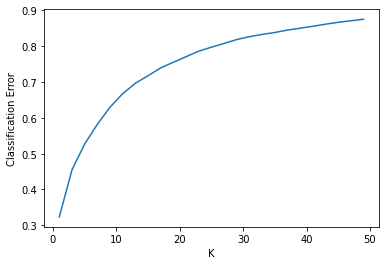

In [ ]:
class_error = 1.0 - np.array(accuracy_array)
plt.plot(k_array, class_error)
plt.xlabel('K')
plt.ylabel('Classification Error')
plt.show()

In [ ]:
minv = np.argmin(class_error)
OptK = k_array[minv]
print ("Optimal value of K is %d " %  OptK)

Optimal value of K is 1 


In [ ]:
knn = KNeighborsClassifier(n_neighbors=OptK)

# fitting the model
knn.fit(X_train2, y_train2)

# predict
pred = knn.predict(X_test2)

# evaluate accuracy
print(accuracy_score(y_test2, pred))

0.6726386699154364


In [ ]:
pred

array(['10400 OLD GEORGETOWN ROAD(GIANT PARKING)',
       'EB RT 28 @ GERMANTOWN RD', 'SHADY GROVE RD/BRIARDALE RD', ...,
       '12208 SELFRIDGE RD', 'PARKING LOT OF 10400 ODL GEORGETOWN RD',
       'NORTHWOOD HIGH SCHOOL'], dtype=object)

In [ ]:
y_test2

array([['10400 OLD GEORGETOWN ROAD(GIANT PARKING)'],
       ['DARNESTOWN RD / BLACK ROCK RD'],
       ['SHADY GROVE RD/BRIARDALE RD'],
       ...,
       ['12208 SELFRIDGE RD'],
       ['25921 RIDGE RD'],
       ['UNIVERSITY BLVD / ARCOLA AVE']], dtype=object)

**INSIGHT**:Predicted the accident prone locations from traffic violations dataset 

**Accident prediction using optimized k**

In [ ]:
acc = Demo_data.iloc[:,[20]]
acc.head()

,Contributed_To_Accident
Date_Of_Stop,
2019-11-08,False
2019-12-08,False
2019-12-08,False
2019-12-08,False
2019-12-08,False


In [ ]:
Demo_data.Description = labelEncoder.fit_transform(Demo_data.Description.astype(str))
labelEncoder.classes_

array(['0', '1', '10', ..., '9997', '9998', '9999'], dtype=object)

In [ ]:
df1.Race = labelEncoder.fit_transform(df1.Race.astype(str))
labelEncoder.classes_

array(['ASIAN', 'BLACK', 'HISPANIC', 'NATIVE AMERICAN', 'OTHER', 'WHITE'],
      dtype=object)

In [ ]:
df1.Gender = labelEncoder.fit_transform(df1.Gender.astype(str))
labelEncoder.classes_

array(['F', 'M', 'U'], dtype=object)

In [ ]:
data1 =  Demo_data.iloc[:,[3,5,6,8,9,10,11,14,15,21,22,27,30]]

In [ ]:
data1.head()

,Description,Latitude,Longitude,Belts,Personal_Injury,Property_Damage,Fatal,Alcohol,Work_Zone,Race,Gender,day_of_week,hour
Date_Of_Stop,,,,,,,,,,,,,
2019-11-08,13277,38.989743,-77.097770,0,0,0,0,0,0,1,1,4,21
2019-12-08,9962,39.174110,-77.246170,0,0,0,0,0,0,5,1,6,14
2019-12-08,6299,39.182016,-77.238221,0,0,0,0,0,0,1,1,6,22
2019-12-08,8559,39.160508,-77.284023,0,0,0,0,0,0,1,1,6,22
2019-12-08,11327,38.984247,-77.090548,0,0,0,0,0,0,1,1,6,22


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
data1, acc, test_size=0.2, random_state=42)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
accuracy = cross_val_score(knn, X_train2, y_train2, cv=10, scoring='accuracy')
print (accuracy.mean())

0.9772034977049084


In [ ]:
import warnings
warnings.filterwarnings('ignore')
accuracy_array = []
k_array = []
for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(knn, X_train2, y_train2, cv=10, scoring='accuracy')
    accuracy_array.append(accuracy.mean())
    k_array.append(k)
print (accuracy_array)
print(k_array)

In [ ]:
class_error = 1.0 - np.array(accuracy_array)
plt.plot(k_array, class_error)
plt.xlabel('K')
plt.ylabel('Classification Error')
plt.show()

In [ ]:
minv = np.argmin(class_error)
OptK = k_array[minv]
print ("Optimal value of K is %d " %  OptK)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=OptK)

# fitting the model
knn.fit(X_train2, y_train2)

# predict
pred = knn.predict(X_test2)

# evaluate accuracy
print(accuracy_score(y_test2, pred))

**INSIGHT**: Even with prediction of accidents by calculating optimized k using KNN Classifier, the accuracy of the test scores for both are almost same.

## **SUMMARY**:
## Traffic Violation causes and Accident Analysis

**Akhil Kadarla**

**UIN : 01193018**

**Observations**:

We compare various feature of the data set with our target column and come up with various visual aid to find which all features are highly co-related to our target variable.Based on these co-relation features we then build predictive models to predict the if a violation has contributed to accident or not based on the given set of features.

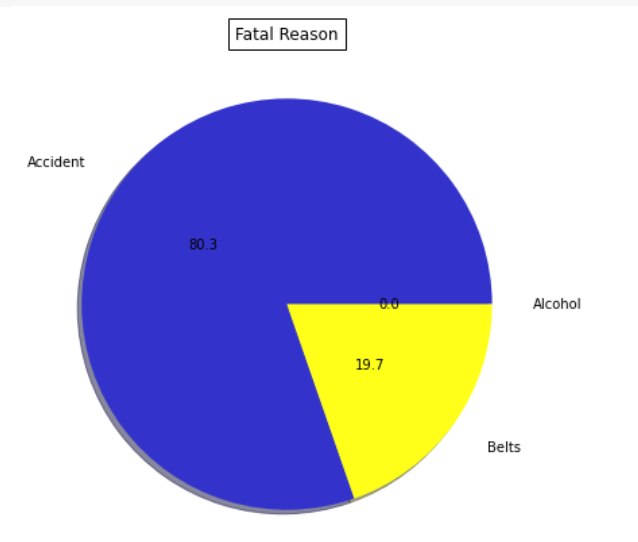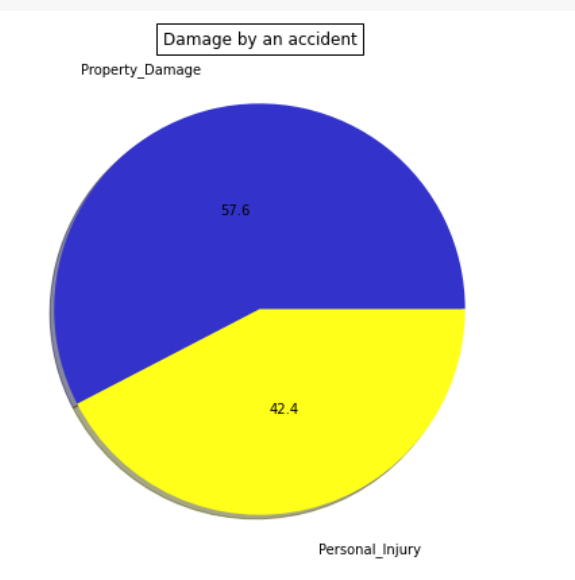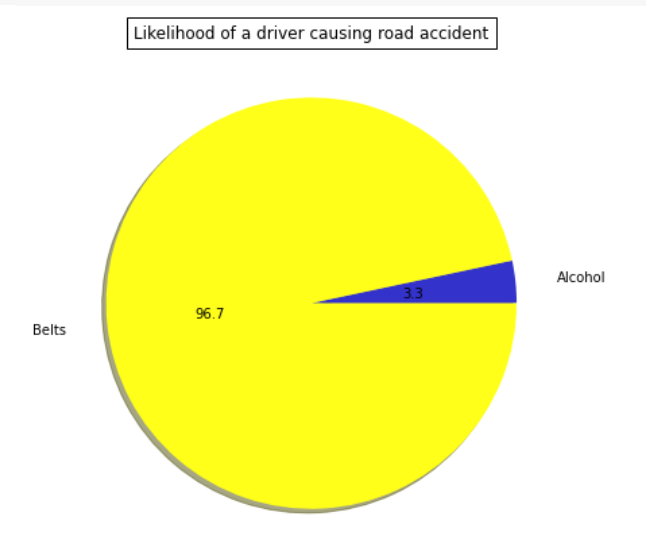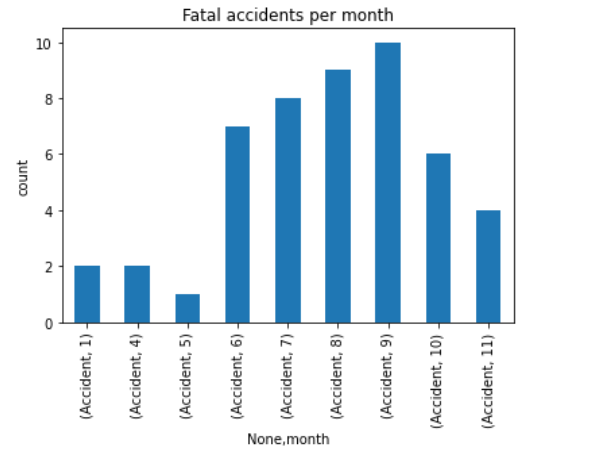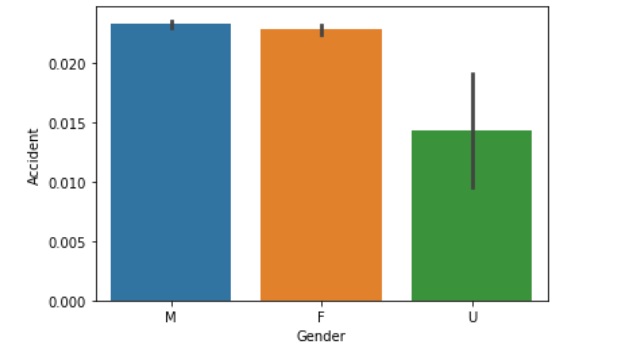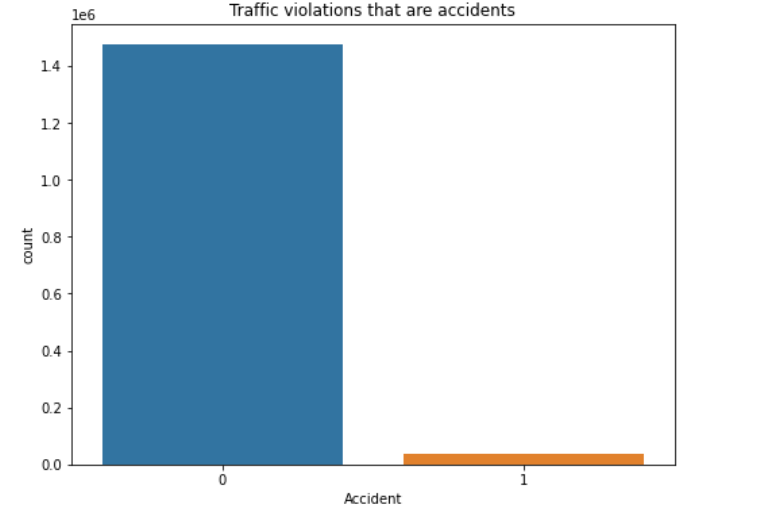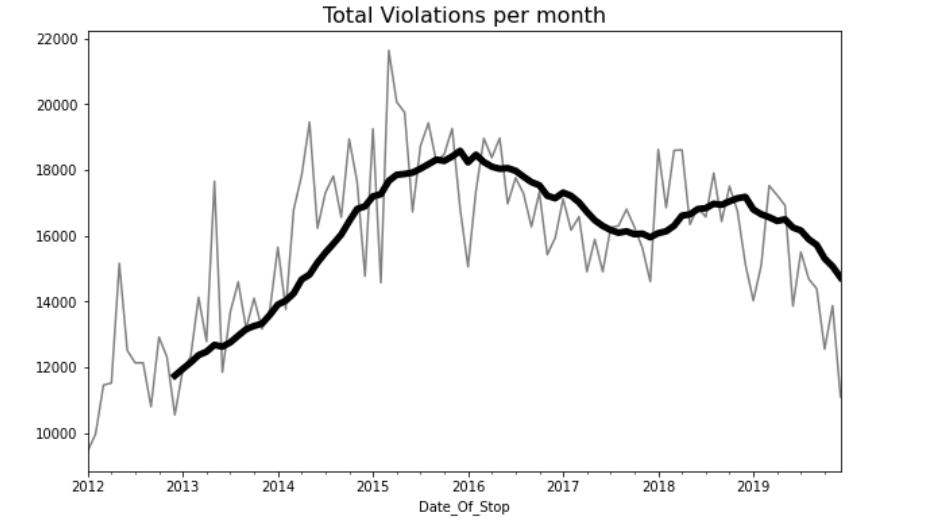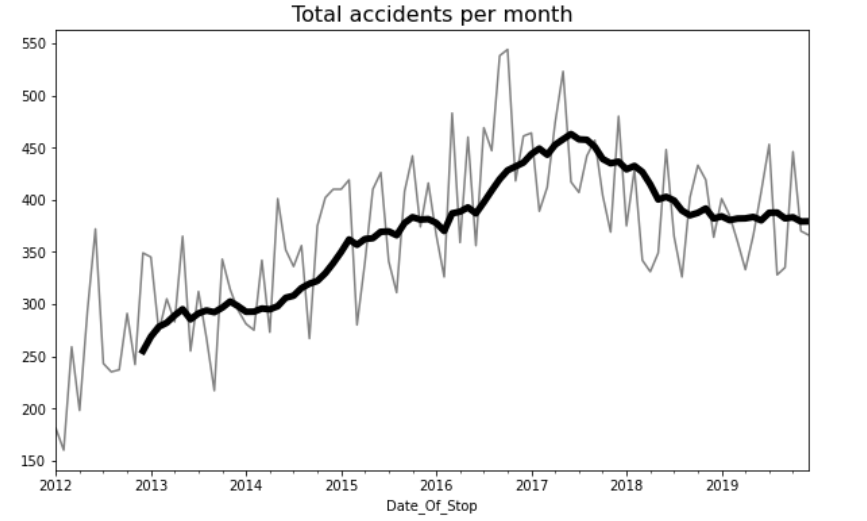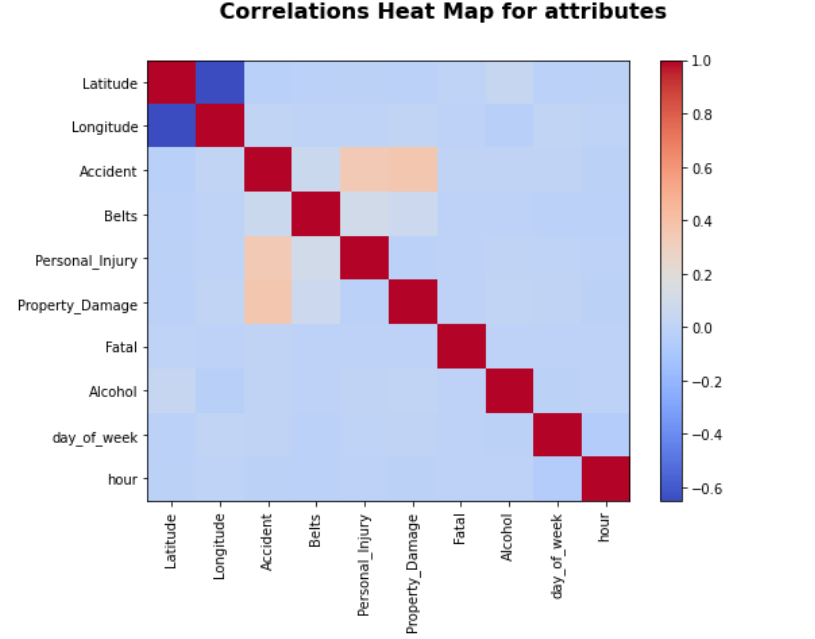

## Results & Conclusion

Proposed an approach of understanding, analyzing, and extracting useful information out of the huge dataset on traffic violations made in a state of Maryland during certain time period.

The findings made out of this project could be used for long term. Future enhancements can be made on the project to make
in more useful for the drivers.

 1. Predictor variable (train) for all regressions : ['Description', 'Latitude', 'Longitude', 'Belts', 'Personal_Injury',
       'Property_Damage', 'Fatal', 'Alcohol', 'Work_Zone', 'Race', 'Gender',
       'day_of_week', 'hour']
 2. Target variable (test) : ['Accident']

- **KNN Classifier Accuracy Score - 96.5%**
- **Random Forest Model Accuracy Score - 26.8%**
- **Logistic regression Accuracy Score - 96.8%**

From the above acuuracy score we can see that KNN Classifier Model is best model as it gives good accuracy score comparing to other models.

- **KNN Classifier Accuracy Score for location prediction - 66.2%**

**Metrics**:
- Mean square error for Logistic: 0.035210850668747816
- Mean square error for KNN: 0.03153475604833284

## PREDICTION: 
1. Predicting a comprehensive understanding of the reasons of violations so as to determine the underlying if it is contributing to an accident.
2. Predicting accident locations to find out the maximum issue prone sites in Maryland with the traffic violations dataset. This helps to warn drivers.

**Strengths**:
- The statistics can be used to educate vehicle drivers in Maryland to help them reduce future accidents by leveraging this data in driving test manuals.
- It gives an insight of future preventions by getting awareness about the related statistics.

#Video Prasentation

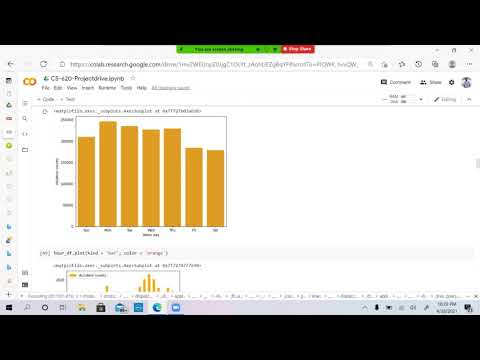

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('X3G4V-yqUtI')

**References**

[1] Peden, M, R. Scurfield, D. Sleet, D. Mohan, A.A.Hyder and E. Jarwan et al (Eds): 2004, “World report on road traffic injury prevention summary” World Health Organization. Geneva, Switzerland. Available at:
http://www.who.int/violence_injury_prevention/publications/road_traffic/world_report/summary_en_rev.pdf

[2] http://www.nhtsa.gov/

[3] http://en.wikipedia.org/wiki/Traffic_stop

[4] https://www.geeksforgeeks.org/generating-word-cloud-python/

[5] https://plot.ly/python/

[6] https://matplotlib.org/